Avacado Project

Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold




In [1]:
#importing libraries
import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
import regex



Saving file in data frame for prediction

In [2]:
df=pd.read_csv(r"C:\Users\Srividya\Downloads\Avacodo\avocado.csv")

the below data frame we stored only for the analysis purpose.

In [3]:
df1=pd.read_csv(r"C:\Users\Srividya\Downloads\Avacodo\avocado.csv")


In [4]:
df1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Here type and region are string data type columns and year,date are date-year format data type(object data type) columns and the target column is average price which is continous data type and more column is region we are going to predict that is of string data type (categorical type).hence we are going to predict both continous and string data type columns.Hence we this is classification as well as Regression problem

In [5]:
df1.head(60)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


In [6]:
df1.tail(60)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18189,0,2018-03-25,1.04,14503.47,78.95,148.37,0.00,14276.15,9992.31,4283.84,0.00,organic,2018,Syracuse
18190,1,2018-03-18,1.19,6981.22,162.32,87.87,0.00,6731.03,2782.91,3948.12,0.00,organic,2018,Syracuse
18191,2,2018-03-11,1.25,4685.01,168.95,61.01,0.00,4455.05,775.90,3679.15,0.00,organic,2018,Syracuse
18192,3,2018-03-04,1.42,3061.66,395.14,89.31,0.00,2577.21,721.50,1855.71,0.00,organic,2018,Syracuse
18193,4,2018-02-25,1.30,4162.96,154.36,133.07,0.00,3875.53,1645.95,2229.58,0.00,organic,2018,Syracuse
18194,5,2018-02-18,1.30,5092.83,310.36,84.43,0.00,4698.04,2136.41,2561.63,0.00,organic,2018,Syracuse
18195,6,2018-02-11,1.23,4815.48,69.81,56.64,0.00,4689.03,1972.88,2716.15,0.00,organic,2018,Syracuse
18196,7,2018-02-04,1.22,6294.16,85.22,152.09,0.00,6056.85,2847.48,3209.37,0.00,organic,2018,Syracuse
18197,8,2018-01-28,1.19,6393.58,30.09,128.49,0.00,6235.00,5670.94,564.06,0.00,organic,2018,Syracuse
18198,9,2018-01-21,1.27,3159.80,92.12,73.17,0.00,2994.51,2117.69,876.82,0.00,organic,2018,Syracuse


In [7]:
df1.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [8]:
df1.shape

(18249, 14)

EDA

DATA PREPROCESSING

checked unique values of the column

In [9]:
df1.type.unique()

array(['conventional', 'organic'], dtype=object)

In [10]:
df1.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [11]:
df1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [12]:
df1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


EDA

DATA PREPROCESSING

In [13]:
#checks nulls values of columns if present any
df1.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [15]:
len(df1['year'].unique())

4

In [16]:
df1['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [17]:
year_sale=df1.pivot_table(values='AveragePrice',index='year')
year_sale

,AveragePrice
year,
2015,1.375590
2016,1.338640
2017,1.515128
2018,1.347531


the average sale price is high in year 2017

In [18]:
df1.groupby(['region'])['AveragePrice'].value_counts()




region            AveragePrice
Albany            1.43            10
                  1.79             8
                  1.93             8
                  1.42             7
                  1.47             7
                                  ..
WestTexNewMexico  2.50             1
                  2.57             1
                  2.79             1
                  2.83             1
                  2.93             1
Name: AveragePrice, Length: 6359, dtype: int64

it shows the regionwise average price of avacados

In [19]:
df1.groupby(['year'])['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

it shows the year wise price and category wise count of the avacados sold

In [20]:
df1.groupby(['region'])['Total Volume'].value_counts()

region            Total Volume
Albany            774.20          1
                  814.13          1
                  831.69          1
                  858.83          1
                  887.29          1
                                 ..
WestTexNewMexico  1122062.47      1
                  1159488.49      1
                  1198679.87      1
                  1272039.80      1
                  1637554.42      1
Name: Total Volume, Length: 18249, dtype: int64

it shows region wise total volume of the avacados and its counts

In [21]:
df1.groupby(['year'])['AveragePrice'].value_counts()


year  AveragePrice
2015  1.03            85
      0.98            83
      0.99            81
      1.09            78
      1.08            77
                      ..
2018  2.16             1
      2.18             1
      2.22             1
      2.27             1
      2.30             1
Name: AveragePrice, Length: 835, dtype: int64

it shows year wise average price of the avacados and its counts

(-1.1126371486968112,
 1.1137986926286247,
 -1.1142169866266933,
 1.1122188546987426)

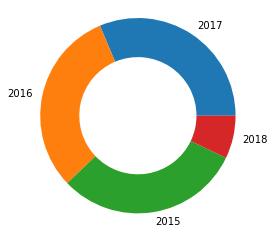

In [22]:
sorted_counts=df1['year'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

it shows year wise count of avacados sold and it is high in 2015 and 2016

(-1.1000710816610668,
 1.1000414433940293,
 -1.1000735285292487,
 1.1000389965258475)

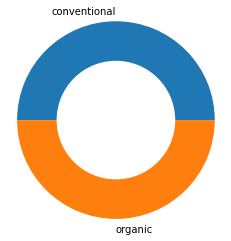

In [23]:
sorted_counts=df1['type'].value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,wedgeprops={'width':0.4})
plt.axis('square')

both conventional and organic category of avacados are equal in counts

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: AveragePrice, dtype: int64


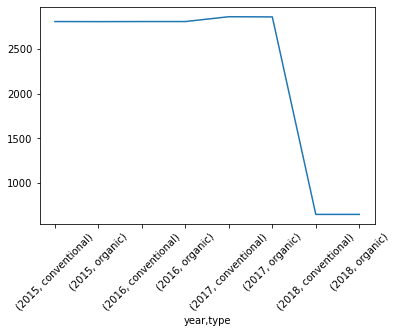

In [24]:
grpby_plot = df1.groupby(['year', 'type']).count()['AveragePrice']
print(grpby_plot)
  
# plot the result
grpby_plot.plot()
plt.xticks(rotation=45)
plt.show()

this shows both conventional and organic avacados are decreased in its sales from the year it has started in 2015.it came down too loww in 2018

In [25]:
#seperate date and month column for analysis purpose
df1['Date']=pd.to_datetime(df1['Date'])
df1['Month']=df1['Date'].apply(lambda x:x.month)


In [26]:
df1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


Text(0.5, 1.0, 'Average Price by Month')

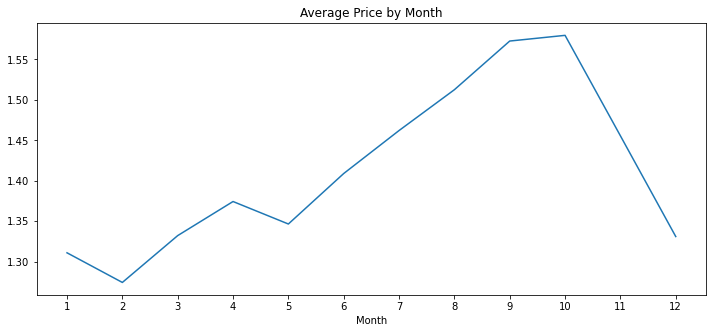

In [27]:
month_wise=df1.groupby('Month').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(0,13)) 
month_wise['AveragePrice'].plot(x=df1.Month)
plt.title('Average Price by Month')

it is important and it shows the seasonal changes of selling of avacados within in a year averagely.so we can know at which month of the year it sells best

Text(0.5, 1.0, 'Average Price by year')

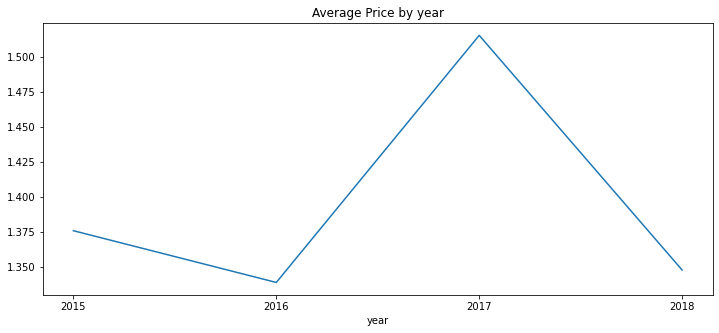

In [28]:
year_wise=df.groupby('year').mean()
fig, ax = plt.subplots(figsize=(12,5))
ax.xaxis.set(ticks=range(2015,2019)) 
year_wise['AveragePrice'].plot(x=df1.year)
plt.title('Average Price by year')

it shows of selling of avacados within the year ranges in the given dataset.the avacado sold with high average price in 2017 and it came too low down to 2018

Text(0, 0.5, 'AveragePrice')

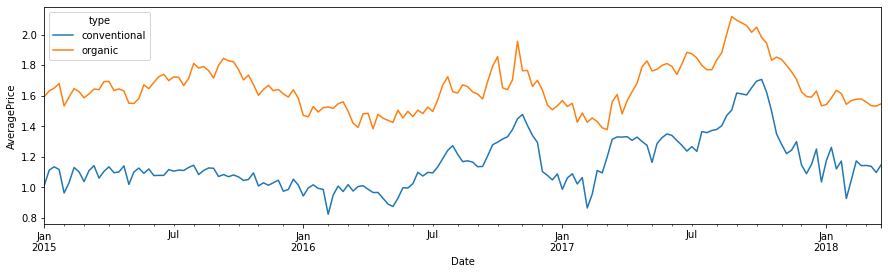

In [29]:
month_category=df1.pivot_table(index='Date', columns='type', aggfunc='mean')['AveragePrice']
month_category.plot(figsize=(15,4))
plt.ylabel('AveragePrice')

it shows the multivariate analysis graph.the type of avacados in the given year range selling pattern it shows.we can see the price drops at 2018

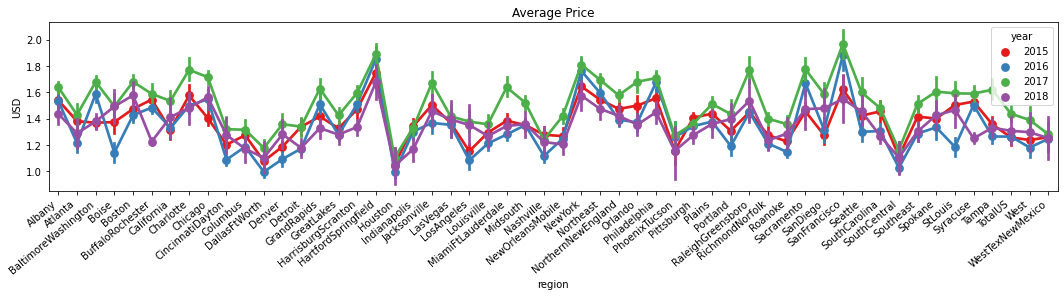

In [30]:
plt.figure(figsize=(15,4))
ax=sns.pointplot(x='region', y='AveragePrice', data=df1, hue='year', palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Average Price')
plt.ylabel('USD')
plt.show()

it shows the region wise graph,the avacados selling average price at each year we can observe from this.the sanfrancisco is the most avacado selling region and it sold highly in all the years we can conclude

Text(0, 0.5, 'USD')

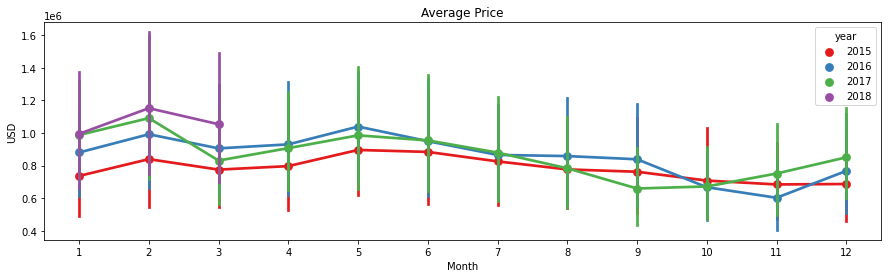

In [31]:
plt.figure(figsize=(15,4))
sns.pointplot(x='Month', y='Total Volume', data=df1, hue='year', palette='Set1')
plt.title('Average Price')
plt.ylabel('USD')

the year wise month wise graph shows the average price increase and decrease of avacados in each month.the most selling month is jan,feb and march in all the years 2015-2018

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: Total Volume, dtype: int64


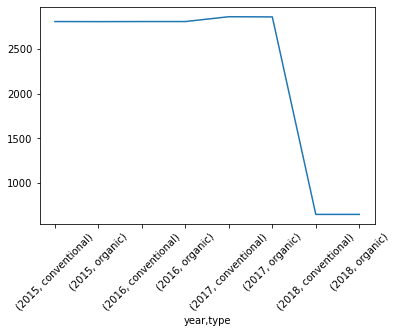

In [32]:
grpby_plot = df1.groupby(['year', 'type']).count()['Total Volume']
print(grpby_plot)
  
# plot the result
grpby_plot.plot()
plt.xticks(rotation=45)
plt.show()

As we seen previously the average price of the avacado drops in 2018 as like that we can observe here the total volume  of the avacado also drops at 2018

In [33]:
#value counts of both category avacados   
df1['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [34]:
df1['region'].nunique()# there are 54 regions

54

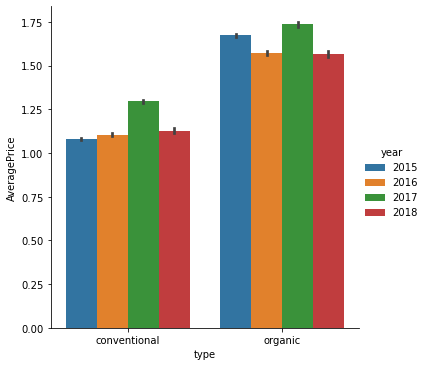

In [35]:
p=sns.catplot(x="type",y="AveragePrice",hue="year",data=df1,kind="bar")
plt.show()

this shows year wise and category wise avacados average selling price .the most selling average price is organic only since its cost is high than conventional

<AxesSubplot:title={'center':'Each Category And its Average Price'}, xlabel='type', ylabel='AveragePrice'>

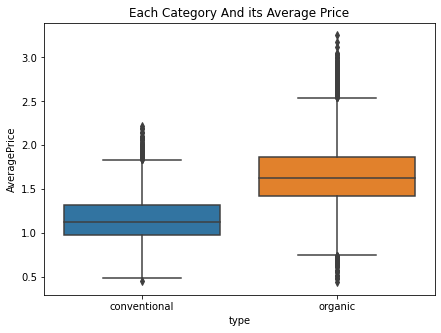

In [36]:
plt.figure(figsize = (7, 5))
plt.title("Each Category And its Average Price")
sns.boxplot(x='type',y='AveragePrice',data=df1)

the average price of organic avacados is higher than the conventional.since its median and range values are high.median value is around 1.8

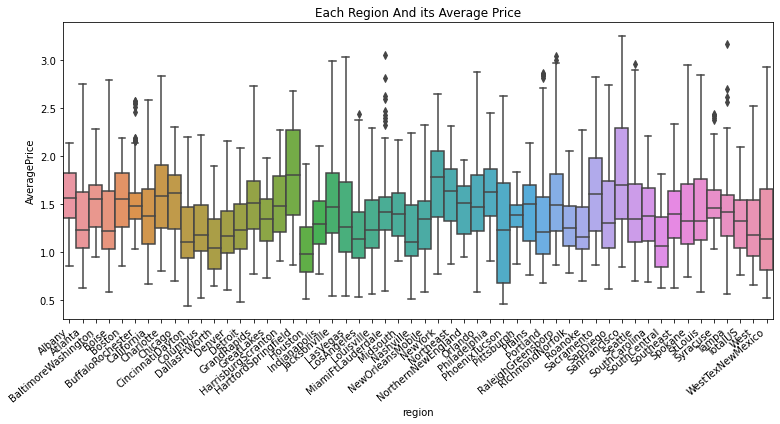

In [37]:
plt.figure(figsize = (11, 6))
plt.title("Each Region And its Average Price")
ax=sns.boxplot(x='region',y='AveragePrice',data=df1,width=1,whis=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

this shows region wise average selling price of the avacados.the median and the value is high in sanfrancisco and hartford springfield region

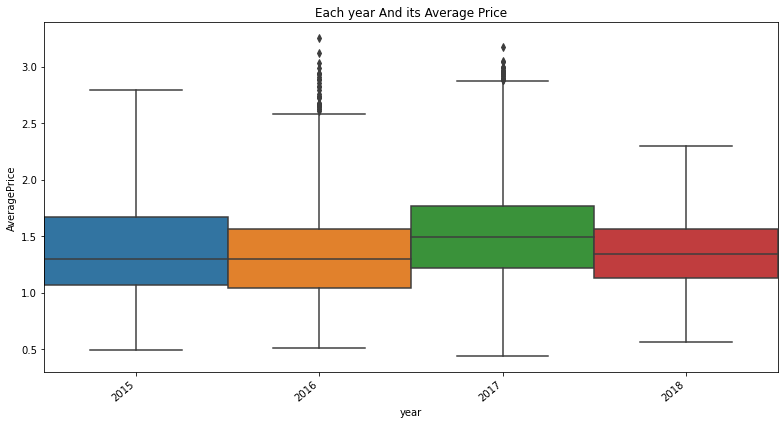

In [38]:
plt.figure(figsize = (11, 6))
plt.title("Each year And its Average Price")
ax=sns.boxplot(x='year',y='AveragePrice',data=df1,width=1,whis=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

average selling price of avacado is high in the year 2017 

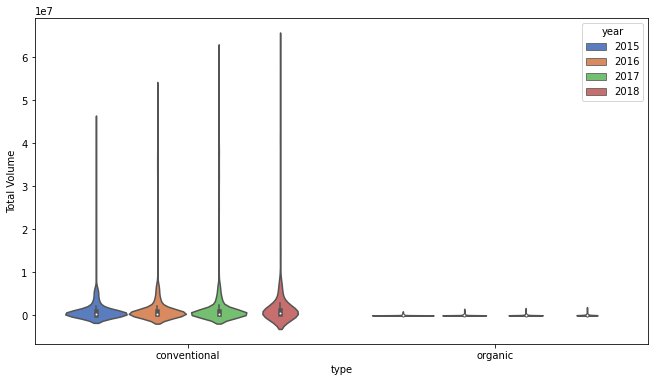

In [39]:
plt.figure(figsize = (11, 6))
ax = sns.violinplot(x="type", y="Total Volume", hue="year",data=df1, palette="muted")
plt.show()

the total volume of conventional avacados is higher than organic 

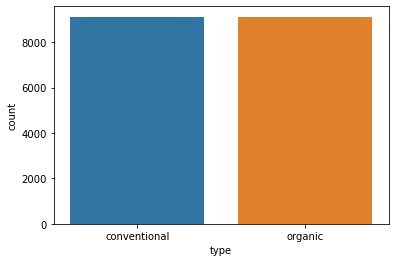

In [40]:
ax = sns.countplot(x="type", data=df1)

both the type of avacados are equal in quantities hence its is a balanced data set

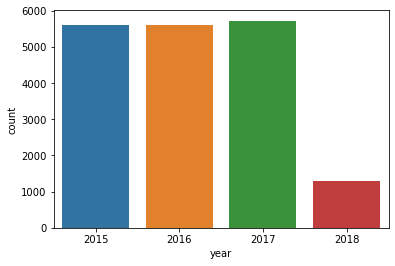

In [41]:
ax = sns.countplot(x="year", data=df1)

the count of  avacado selling is very low in the year 2018

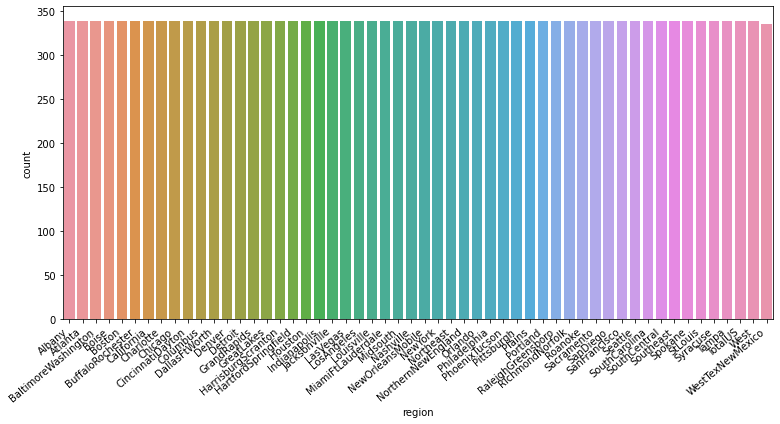

In [42]:
plt.figure(figsize = (11, 6))
ax = sns.countplot(x="region", data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

all regions has same counts of avacados

In [43]:
df_num = df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

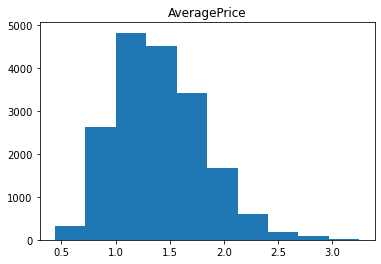

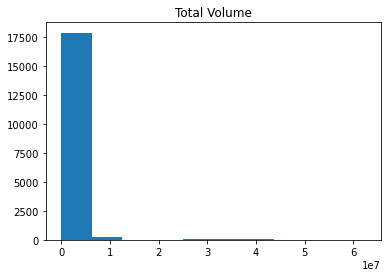

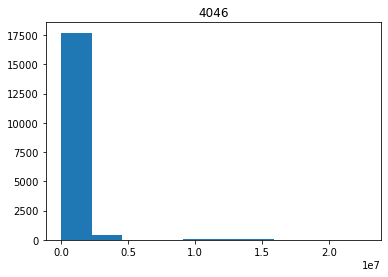

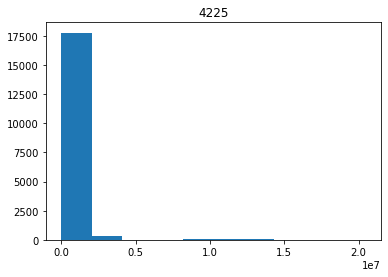

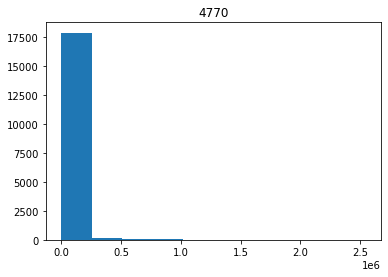

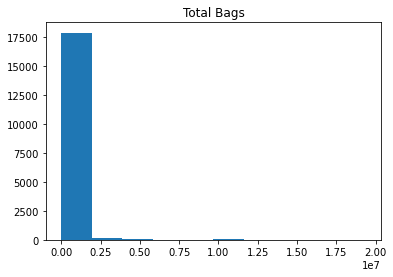

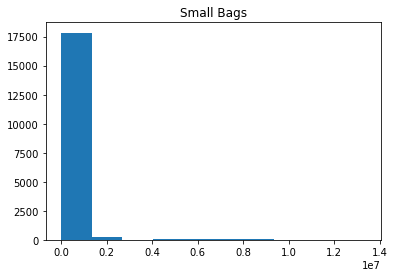

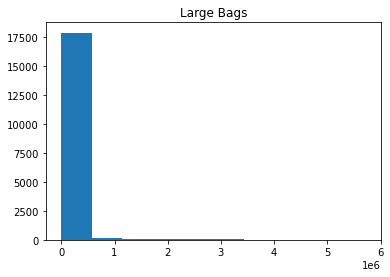

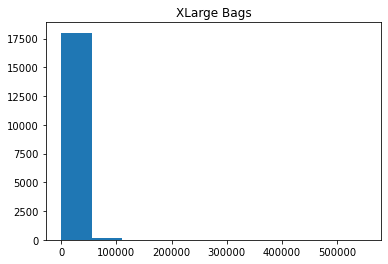

In [44]:
for i in df_num.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

total volume of avacados are almost normal in distribution.and all others are suddenly dropped after was in first high range

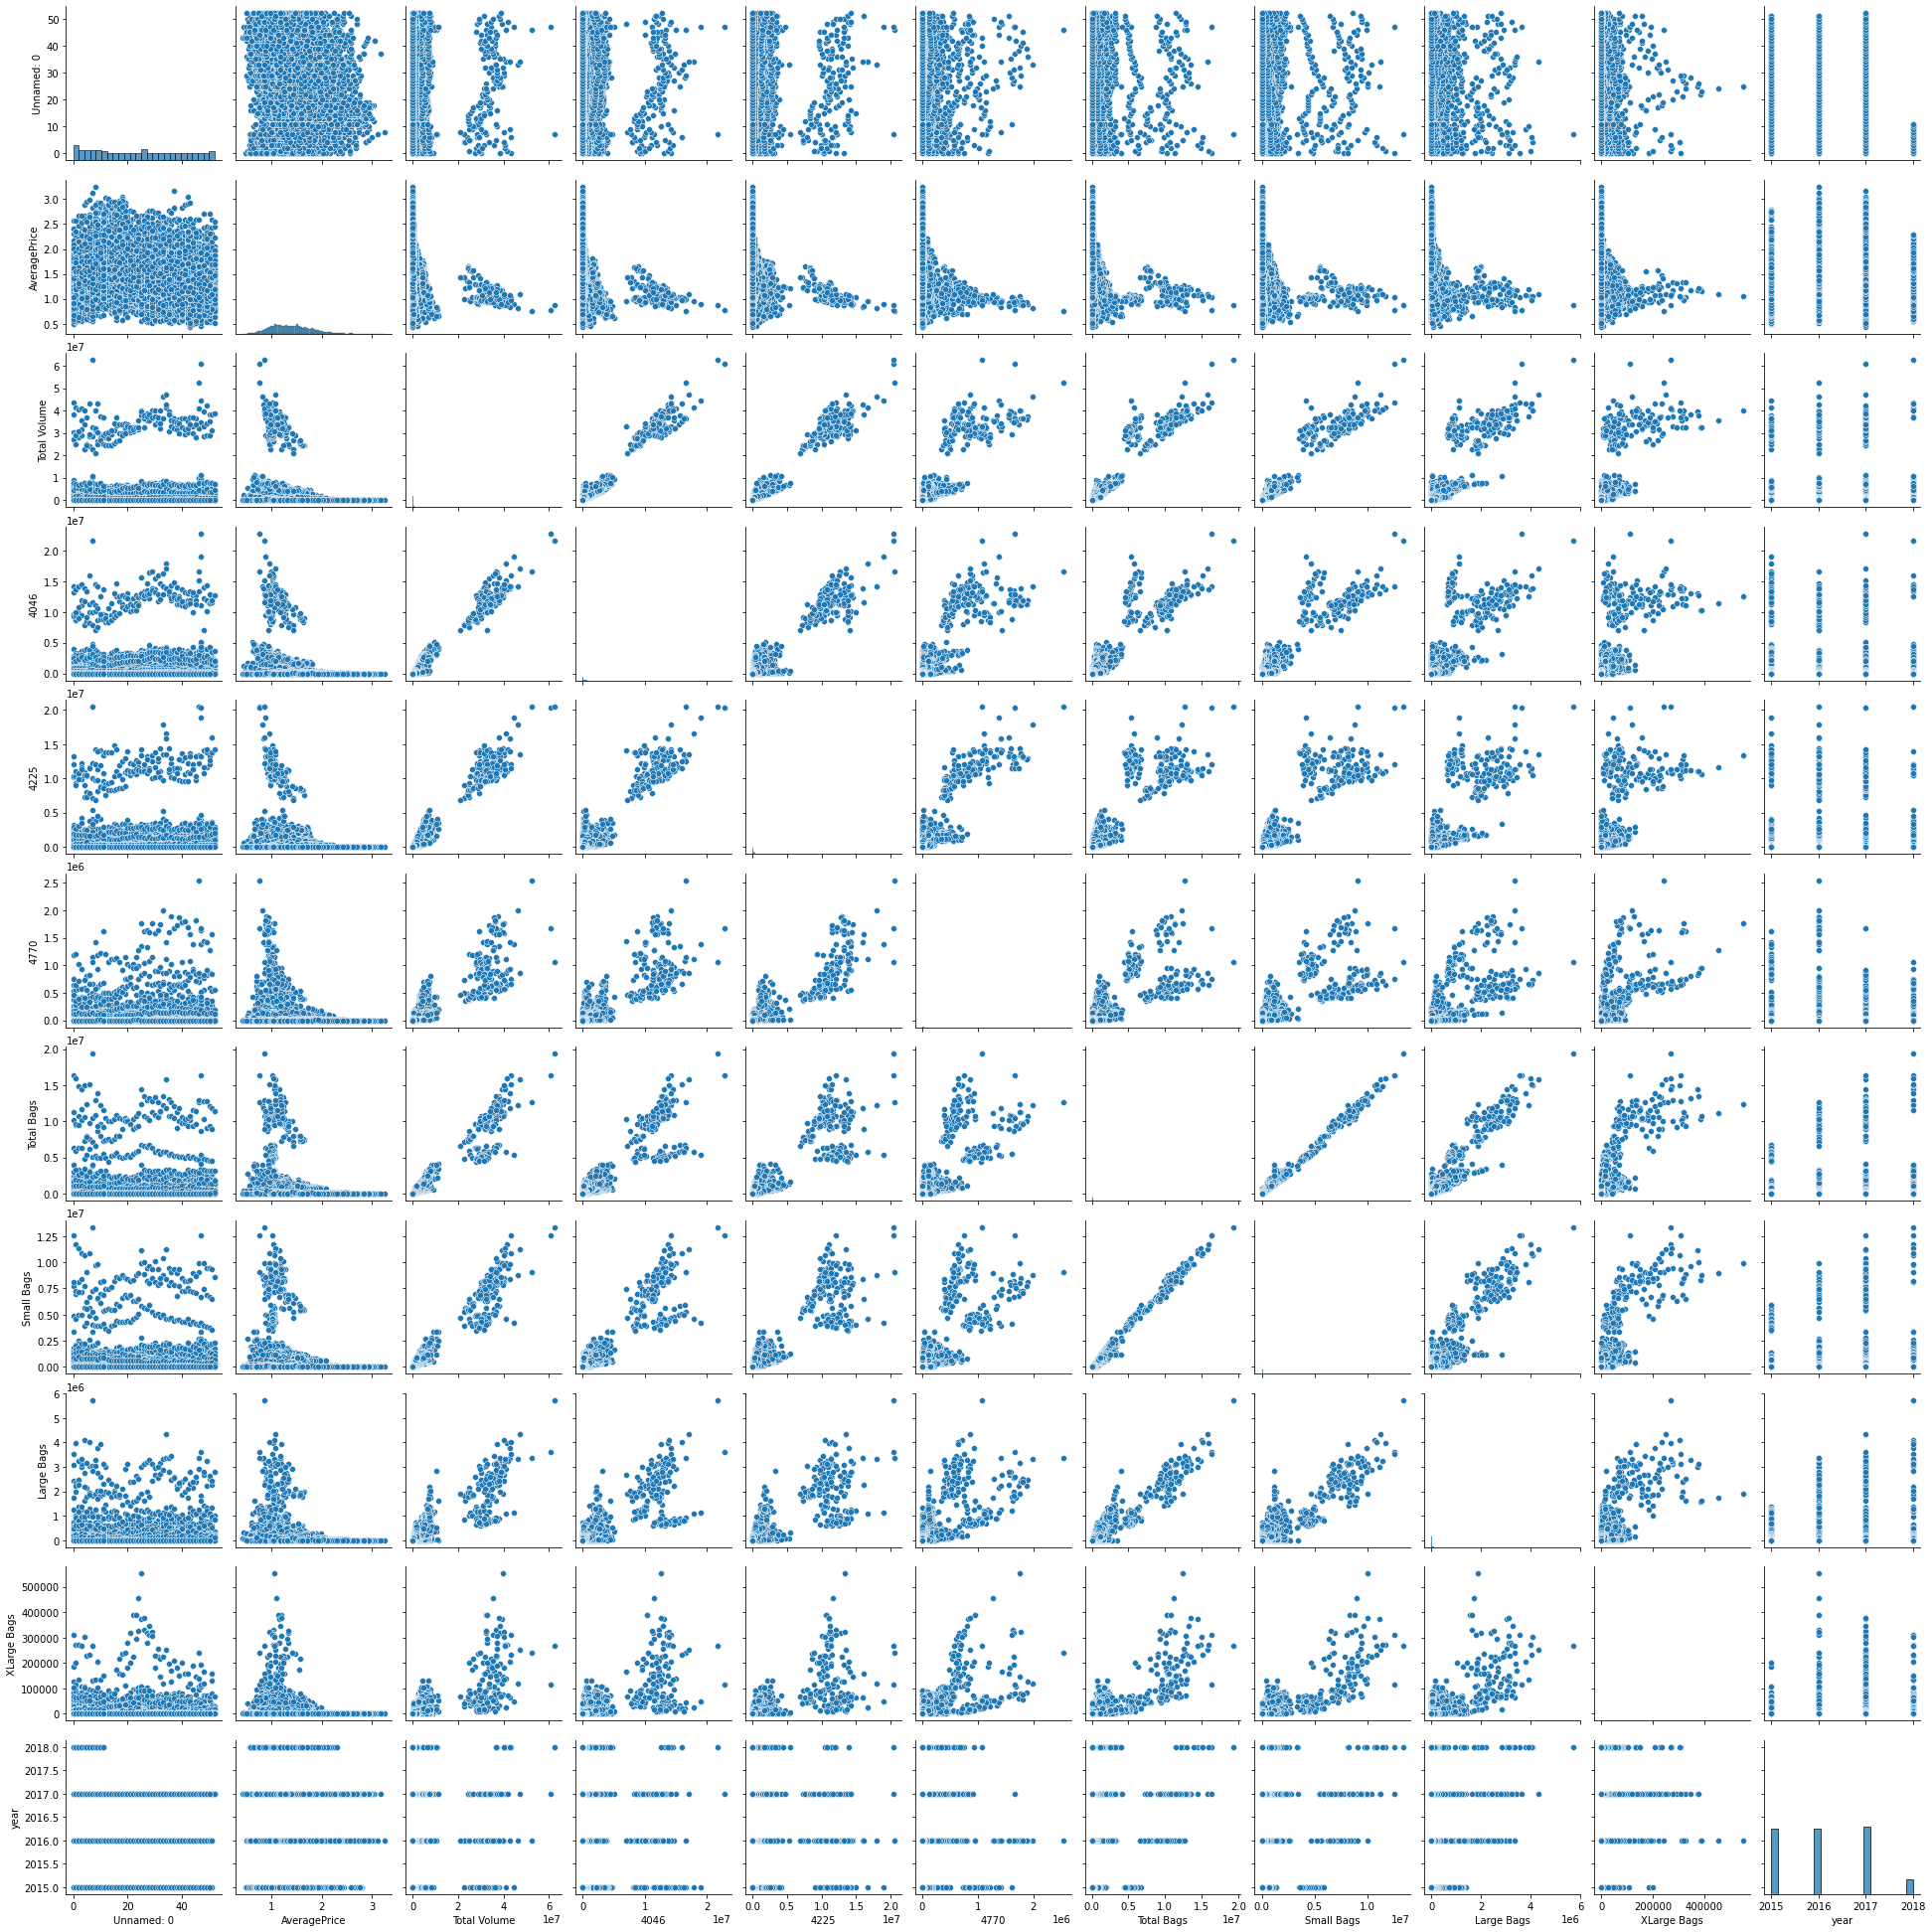

In [45]:
sns.pairplot(df)
plt.show()

this shows multivariate analysis graph we can study each variable relationship with the other variable from this

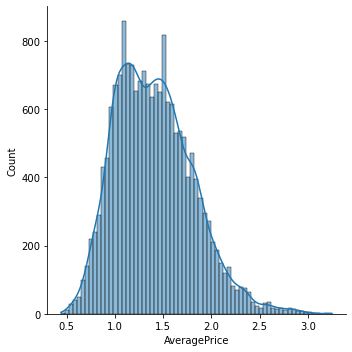

In [46]:
sns.displot(df1["AveragePrice"],kde=True)

<AxesSubplot:xlabel='Total Volume', ylabel='Count'>

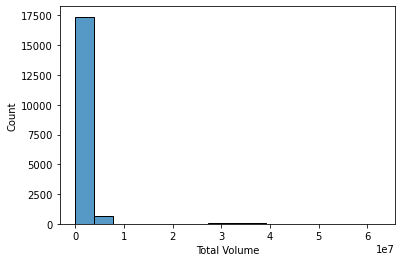

In [47]:

sns.histplot(data=df1,x='Total Volume',bins=16)


FEATURE ENGINEERING

#convert date object data type to numeric type because we are going to put into the model this dataset

In [48]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].dt.strftime('%m/%Y')

In [49]:
df.drop('year',axis=1,inplace=True)

In [50]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,0,12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,1,12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2,12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,3,12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,4,11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,02/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico
18245,8,01/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico
18246,9,01/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico
18247,10,01/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


FEATURE ENGINEERING

In [52]:
df1.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667,-0.777730
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969


since xlargebags + smallbags + large bags give total bags count.so we dont need that column.so we can drop that column

In [53]:
df['XLarge Bags']=df['Total Bags']-(df['Small Bags']+df['Large Bags'])

In [54]:
df=df.drop(['Unnamed: 0','Total Bags'],axis=1)

In [55]:
#converting string data type to int type using LabelEncoding
le=LabelEncoder()

list1=['Date','type','region']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,36,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.000000e+00,0,0
1,36,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.000000e+00,0,0
2,36,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.000000e+00,0,0
3,36,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.000000e+00,0,0
4,33,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.000000e+00,1,53
18245,3,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.000000e+00,1,53
18246,3,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,1.818989e-12,1,53
18247,3,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.000000e+00,1,53


In [56]:
v=df[list(df.columns)[1]] 
df=df.drop(['AveragePrice'],axis=1) 
df

,Date,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,36,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.000000e+00,0,0
1,36,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.000000e+00,0,0
2,36,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.000000e+00,0,0
3,36,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.000000e+00,0,0
4,33,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.000000e+00,0,0
...,...,...,...,...,...,...,...,...,...,...
18244,7,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.000000e+00,1,53
18245,3,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.000000e+00,1,53
18246,3,13766.76,1191.92,2452.79,727.94,9351.80,42.31,1.818989e-12,1,53
18247,3,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.000000e+00,1,53


In [57]:
df.insert(10,'AveragePrice',v) 
df


,Date,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,AveragePrice
0,36,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.000000e+00,0,0,1.33
1,36,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.000000e+00,0,0,1.35
2,36,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.000000e+00,0,0,0.93
3,36,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.000000e+00,0,0,1.08
4,33,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.000000e+00,0,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...
18244,7,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.000000e+00,1,53,1.63
18245,3,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.000000e+00,1,53,1.71
18246,3,13766.76,1191.92,2452.79,727.94,9351.80,42.31,1.818989e-12,1,53,1.87
18247,3,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.000000e+00,1,53,1.93


In [58]:
#find correlation co.efficient of all variables in table
df.corr()

,Date,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,AveragePrice
Date,1.000000,-0.023133,-0.025019,-0.023117,-0.035702,-0.017673,-0.013545,-0.004362,-0.000091,-0.000155,0.174374
Total Volume,-0.023133,1.000000,0.977863,0.974181,0.872202,0.967238,0.880640,0.747157,-0.232434,0.174176,-0.192752
4046,-0.025019,0.977863,1.000000,0.926110,0.833389,0.925280,0.838645,0.699377,-0.225819,0.192073,-0.208317
4225,-0.023117,0.974181,0.926110,1.000000,0.887855,0.916031,0.810015,0.688809,-0.232289,0.145726,-0.172928
4770,-0.035702,0.872202,0.833389,0.887855,1.000000,0.802733,0.698471,0.679861,-0.210027,0.095252,-0.179446
Small Bags,-0.017673,0.967238,0.925280,0.916031,0.802733,1.000000,0.902589,0.806845,-0.220535,0.164702,-0.174730
Large Bags,-0.013545,0.880640,0.838645,0.810015,0.698471,0.902589,1.000000,0.710858,-0.193177,0.198768,-0.172940
XLarge Bags,-0.004362,0.747157,0.699377,0.688809,0.679861,0.806845,0.710858,1.000000,-0.175483,0.082281,-0.117592
type,-0.000091,-0.232434,-0.225819,-0.232289,-0.210027,-0.220535,-0.193177,-0.175483,1.000000,-0.000280,0.615845
region,-0.000155,0.174176,0.192073,0.145726,0.095252,0.164702,0.198768,0.082281,-0.000280,1.000000,-0.011716


the most positively correlated column is type column with the target column and all the other columns are negatively correlated with target column

<AxesSubplot:>

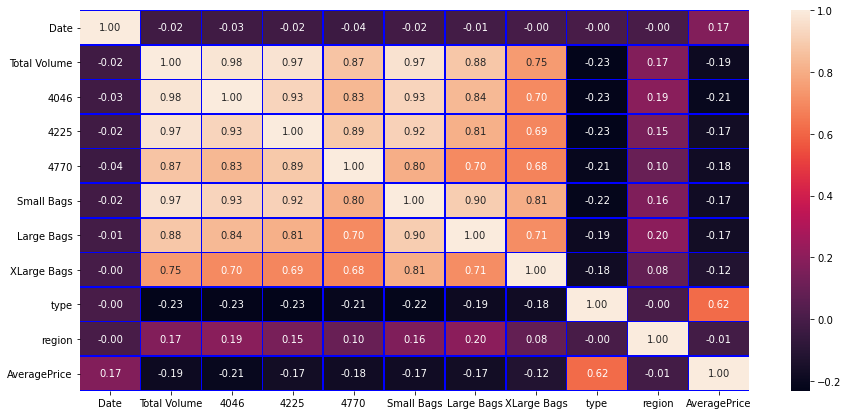

In [59]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="blue",fmt='.2f')

type column is mostly correlated with target so this determines the prediting price of avacados and selling

In [60]:
df.describe()

,Date,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,AveragePrice
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,19.069976,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,1.821947e+05,5.433809e+04,3106.427220,0.499918,26.495644,1.405978
std,11.270001,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,7.461785e+05,2.439660e+05,17692.894582,0.500014,15.583788,0.402677
min,0.000000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,0.000000,0.000000,0.440000
25%,9.000000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,2.849420e+03,1.274700e+02,0.000000,0.000000,13.000000,1.100000
50%,19.000000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,2.636282e+04,2.647710e+03,0.000000,0.000000,26.000000,1.370000
75%,29.000000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,8.333767e+04,2.202925e+04,132.500000,1.000000,40.000000,1.660000
max,38.000000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.338459e+07,5.719097e+06,551693.650000,1.000000,53.000000,3.250000


there is no much skewness because diff between  75% and max is low and mean and std dev are not much close to zero

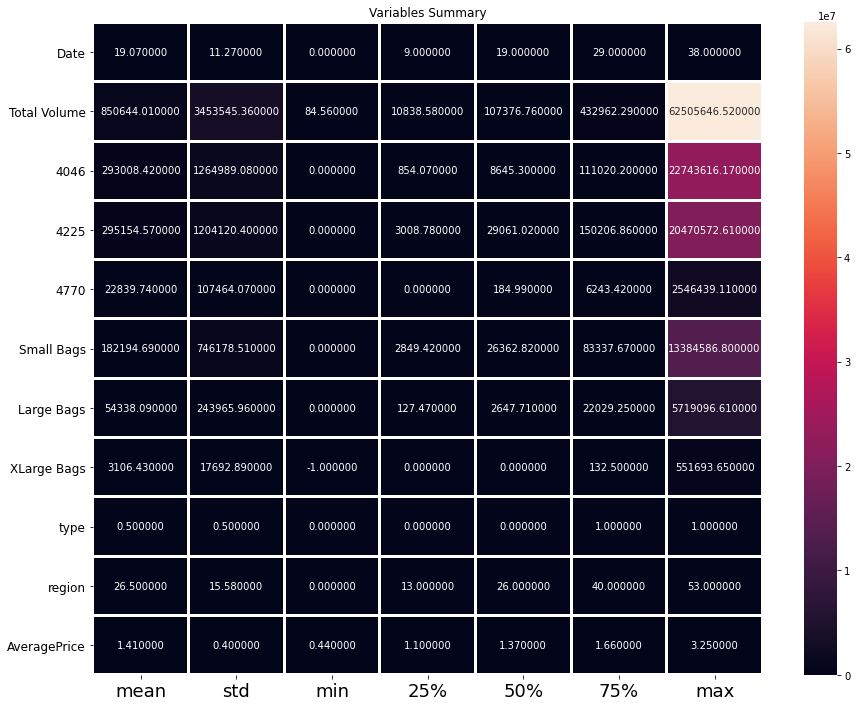

In [61]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

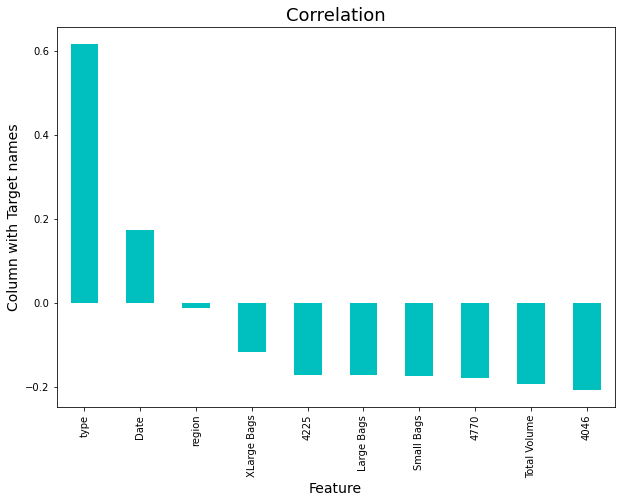

In [62]:
plt.figure(figsize=(10,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

shows both positive and negative correlation of variables with the target column

In [63]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
df.shape


(18249, 11)

In [65]:
df.shape[1]


11

In [66]:
#calculates vif
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
    return(vif)


calc_vif(df)

,Variables,VIF FACTOR
0,Date,3.897678e+00
1,Total Volume,5.213646e+09
2,4046,6.948615e+08
3,4225,6.334458e+08
4,4770,4.974536e+06
5,Small Bags,2.431537e+08
6,Large Bags,2.574606e+07
7,XLarge Bags,1.329424e+05
8,type,3.122887e+00
9,region,3.606634e+00


all columns are having correct VIF range now.

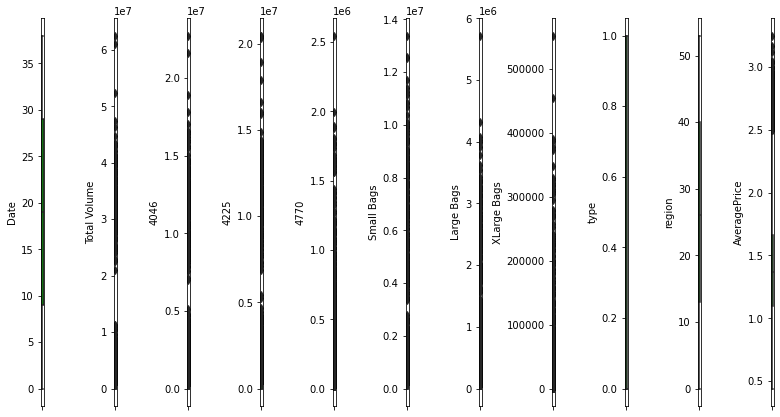

In [67]:
collist=df.columns.values
ncol=15
nrows=8
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [68]:
#ckeck skewness
df.skew()

Date            -0.012814
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
region           0.000030
AveragePrice     0.580303
dtype: float64

#checking Z-score to remove outliers

In [69]:

import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape


(18249, 11)

In [70]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([ 2,  2,  7, ..., 10, 10, 10], dtype=int64))


In [71]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(18249, 11)
(17651, 11)


some outliers got removed

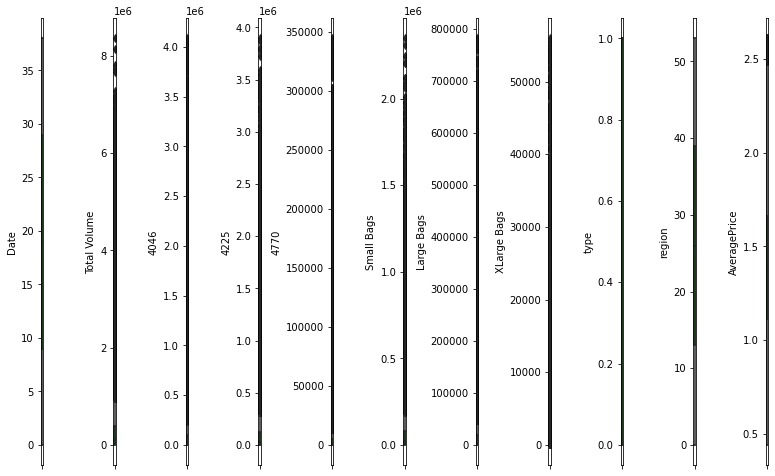

In [72]:
#checking outliers
collist=df_new.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

the column item visibility has less outliers and skewness now

In [73]:
#finds data loss
loss_percent=(18249-17651)/(17651*100)
print(loss_percent)

0.0003387910033425868


data loss percentage is very low.data is cleaned also

In [74]:
df_new


,Date,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,AveragePrice
0,36,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.000000e+00,0,0,1.33
1,36,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.000000e+00,0,0,1.35
2,36,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.000000e+00,0,0,0.93
3,36,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.000000e+00,0,0,1.08
4,33,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.000000e+00,0,0,1.28
...,...,...,...,...,...,...,...,...,...,...,...
18244,7,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.000000e+00,1,53,1.63
18245,3,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.000000e+00,1,53,1.71
18246,3,13766.76,1191.92,2452.79,727.94,9351.80,42.31,1.818989e-12,1,53,1.87
18247,3,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.000000e+00,1,53,1.93


In [75]:
df_new1=df_new

In [76]:
df_new.shape

(17651, 11)

In [77]:
#seggregate input data and output data
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [78]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.38930933, -0.07532391, -0.65742071, ..., -0.67660463,
        -1.01904715, -2.01058988],
       [ 1.38930933, -0.14749743, -0.77717852, ..., -0.67660463,
        -1.01904715, -2.01058988],
       [ 1.38930933,  0.20555557, -0.7317763 , ..., -0.67660463,
        -1.01904715, -2.01058988],
       ...,
       [-1.50878438, -0.77527398, -0.61796649, ..., -0.67660463,
         0.98130886,  1.57828237],
       [-1.50878438, -0.70179733, -0.54701087, ..., -0.67660463,
         0.98130886,  1.57828237],
       [-1.50878438, -0.66738095, -0.35967077, ..., -0.67660463,
         0.98130886,  1.57828237]])

In [79]:
#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x = mmscaler.fit_transform(x)
x

array([[0.95953341, 0.55893336, 0.35498056, ..., 0.40256301, 0.        ,
        0.        ],
       [0.95953341, 0.54510426, 0.32886287, ..., 0.40256301, 0.        ,
        0.        ],
       [0.95953341, 0.61275241, 0.33876453, ..., 0.40256301, 0.        ,
        0.        ],
       ...,
       [0.12981232, 0.42481659, 0.36358503, ..., 0.40256301, 1.        ,
        1.        ],
       [0.12981232, 0.43889538, 0.37905957, ..., 0.40256301, 1.        ,
        1.        ],
       [0.12981232, 0.44548987, 0.41991611, ..., 0.40256301, 1.        ,
        1.        ]])

MODEL EVALUATION AND PREDICTION

Linear Regression

In [80]:
#Linear Regression
#model fitting
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split



In [81]:
#getting best accuracy with help of selecting random state
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:{r2_score(y_train,pred_train)*100}")
    print(f"At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)*100}")
    print("\n")
    
    
    
    

At random state 0,the training accuracy is:51.990146768036595
At random state 0,the testing accuracy is:50.59551124968989


At random state 1,the training accuracy is:51.869323824181066
At random state 1,the testing accuracy is:51.0884357336092


At random state 2,the training accuracy is:52.11572556566597
At random state 2,the testing accuracy is:50.074114774385414


At random state 3,the training accuracy is:51.47078820396489
At random state 3,the testing accuracy is:52.67428062782713


At random state 4,the training accuracy is:51.63325427270136
At random state 4,the testing accuracy is:52.02220080926499


At random state 5,the training accuracy is:51.35487668546168
At random state 5,the testing accuracy is:53.05923751527695


At random state 6,the training accuracy is:51.263841209159736
At random state 6,the testing accuracy is:53.439421720058554


At random state 7,the training accuracy is:51.401436955452375
At random state 7,the testing accuracy is:52.89925409622502


At random s

In [82]:
#evaluation metrics

print("Accuracy:", r2_score(y_test,pred_test)*100)

Accuracy: 52.589660722750175


In [83]:
#cross validation at random state
Train_accuracy=(r2_score(y_train,pred_train)*100)
Test_accuracy=r2_score(y_test,pred_test)*100
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()*100
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for Training is {Train_accuracy} and accuracy score for Testing is {Test_accuracy}")
    print("\n")
    

At cross fold 2 the cv score is -307.0084614907426 and accuracy score for Training is 51.487015117291016 and accuracy score for Testing is 52.589660722750175


At cross fold 3 the cv score is -5.9313631350597085 and accuracy score for Training is 51.487015117291016 and accuracy score for Testing is 52.589660722750175


At cross fold 4 the cv score is -10.106468841503327 and accuracy score for Training is 51.487015117291016 and accuracy score for Testing is 52.589660722750175


At cross fold 5 the cv score is 1.8004505284618988 and accuracy score for Training is 51.487015117291016 and accuracy score for Testing is 52.589660722750175


At cross fold 6 the cv score is -3.772641762672615 and accuracy score for Training is 51.487015117291016 and accuracy score for Testing is 52.589660722750175


At cross fold 7 the cv score is -1.9668641896254786 and accuracy score for Training is 51.487015117291016 and accuracy score for Testing is 52.589660722750175


At cross fold 8 the cv score is 1.293

parameter tuning

In [84]:
#perform gridsearchcv and cross val score on LinearRegression
from sklearn.model_selection import GridSearchCV

parameters={ 'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True,False], 'n_jobs':[None,1,-1], 'positive':[True,False]}
lr=LinearRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}


In [85]:
lr=LinearRegression(copy_X= True, fit_intercept= True, n_jobs= None, normalize= True, positive= False)
lr.fit(x_train,y_train)
pred_test_lr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
lr_score = lr.score(x_train,y_train)
lr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 52.589660722750175
score of model is: 51.487015117291016


In [86]:
cv_score_lr=cross_val_score(lr,x,y,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 1.8004505284619812


model performs well

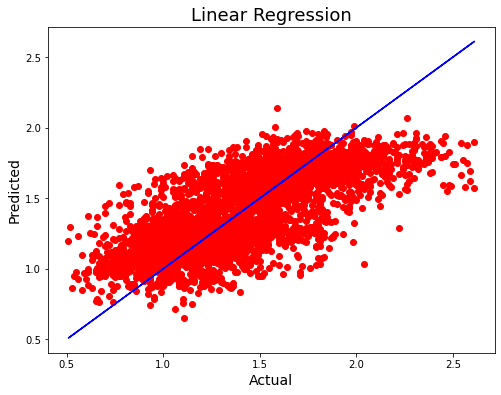

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

most of the points are fits to the best fit line well

In [88]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test))
print("mean squared error",mean_squared_error(y_test,pred_test))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test)))
print("r2_score is",r2_score(y_test,pred_test)*100)

mean absolute error 0.2061660179172031
mean squared error 0.06902430486953526
Root mean squared error 0.2627247701864734
r2_score is 52.589660722750175


Lasso regression

parameter tuning

In [89]:
#perform gridsearchcv and cross val score on lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.0001, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [90]:
ls=Lasso(alpha=1,random_state=0,fit_intercept= True, normalize= False,tol= 0.001)
ls.fit(x_train,y_train)
pred_test_ls=ls.predict(x_test)
pred_train_ls=ls.predict(x_train)
ls_score = ls.score(x_train,y_train)
ls_acc_score=r2_score(y_test,pred_test_ls)
print("Accuracy score is:",ls_acc_score*100)


Accuracy score is: -0.08980570000030053


In [91]:
#checks cv score
for u in range(2,10):
    cv_score_ls=cross_val_score(ls,x,y,cv=5)
    cv_mean_ls=cv_score_ls.mean()
    print("At cv :-",j )
    print("cv_score is:",cv_mean_ls*100)
    print("accuracy score---r2_score is",ls_acc_score*100)

At cv :- 9
cv_score is: -115.6669674837169
accuracy score---r2_score is -0.08980570000030053
At cv :- 9
cv_score is: -115.6669674837169
accuracy score---r2_score is -0.08980570000030053
At cv :- 9
cv_score is: -115.6669674837169
accuracy score---r2_score is -0.08980570000030053
At cv :- 9
cv_score is: -115.6669674837169
accuracy score---r2_score is -0.08980570000030053
At cv :- 9
cv_score is: -115.6669674837169
accuracy score---r2_score is -0.08980570000030053
At cv :- 9
cv_score is: -115.6669674837169
accuracy score---r2_score is -0.08980570000030053
At cv :- 9
cv_score is: -115.6669674837169
accuracy score---r2_score is -0.08980570000030053
At cv :- 9
cv_score is: -115.6669674837169
accuracy score---r2_score is -0.08980570000030053


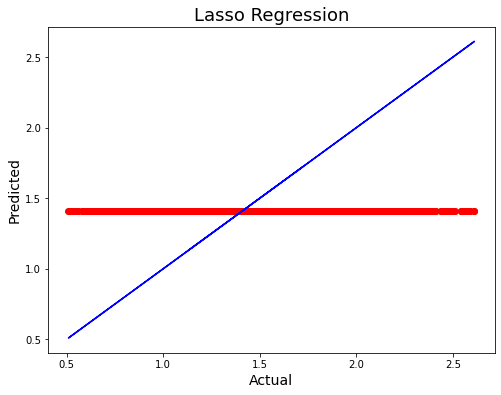

In [92]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

In [93]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_ls))
print("mean squared error",mean_squared_error(y_test,pred_test_ls))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_ls)))
print("r2_score is",r2_score(y_test,pred_test_ls)*100)

mean absolute error 0.31430093855073993
mean squared error 0.14571988659622442
Root mean squared error 0.38173274236856397
r2_score is -0.08980570000030053


RandomForestRegressor

parameter tuning

In [99]:
#perform gridsearchcv and cross val score on RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'n_jobs':[-1],'random_state':[1],'bootstrap': [True, False],'min_samples_split':[2],'min_samples_leaf':[1],'min_impurity_decrease':[0.1]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                                                      


{'bootstrap': False, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_jobs': -1, 'random_state': 1}


In [100]:
rf=RandomForestRegressor(n_jobs= -1, random_state=1,min_impurity_decrease=0.1 ,bootstrap=False,min_samples_leaf= 1, min_samples_split= 2)
rf.fit(x_train,y_train)
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
rf_score = rf.score(x_train,y_train)
rf_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 52.589660722750175
score of model is: 0.0


In [101]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: -115.66696748371801


In [102]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rf))
print("mean squared error",mean_squared_error(y_test,pred_test_rf))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print("r2_score is",r2_score(y_test,pred_test_rf)*100)

mean absolute error 0.31430093855074004
mean squared error 0.14571988659622445
Root mean squared error 0.38173274236856397
r2_score is -0.08980570000032273


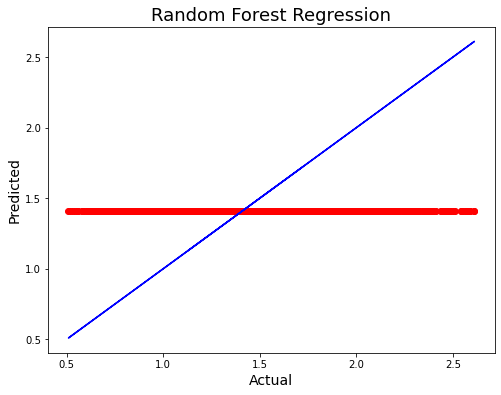

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rf,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Random Forest Regression',fontsize=18)
plt.show()

Ridge Regressor

In [106]:
#perform gridsearchcv and cross val score on Ridge Regressor
from sklearn.linear_model import Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 0.01, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [107]:
rd=Ridge(alpha=0.01,fit_intercept=True,normalize=False,random_state=0,tol=0.001)
rd.fit(x_train,y_train)
pred_test_rd=rd.predict(x_test)
pred_train_rd=rd.predict(x_train)
rd_score = rd.score(x_train,y_train)
rd_acc_score=r2_score(y_test,pred_test_rd)
print("Accuracy score is:",rd_acc_score*100)
print("score of model is:",rd_score*100)

Accuracy score is: 52.58995325983632
score of model is: 51.48701153845433


In [108]:
cv_score_rd=cross_val_score(rd,x,y,cv=5)
cv_mean_rd=cv_score_rd.mean()
print("cv_mean is:",cv_mean_rd*100)

cv_mean is: 1.7980665412838648


In [109]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_rd))
print("mean squared error",mean_squared_error(y_test,pred_test_rd))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_rd)))
print("r2_score is",r2_score(y_test,pred_test_rd)*100)

mean absolute error 0.2061637563591515
mean squared error 0.06902387896730956
Root mean squared error 0.26272395963693446
r2_score is 52.58995325983632


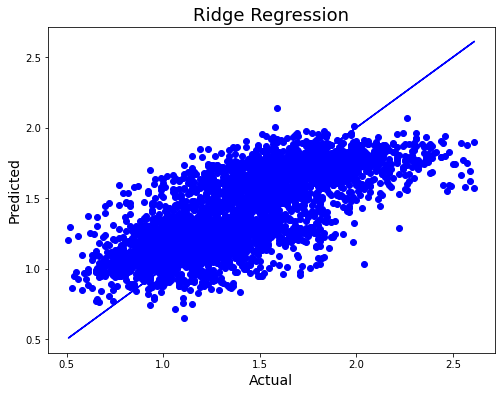

In [110]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rd,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

thus the Ridge regression performs well here.all data points are near to best fit line

Decison Tree Regressor

In [118]:
#perform gridsearchcv and cross val score on Decison Tree Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['squared_error', 'mse'],'splitter':['best','random'],'max_features':['auto', 'sqrt'],'random_state':list(range(0,1)),'min_weight_fraction_leaf':[0.1,0.2]}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

                  

{'criterion': 'squared_error', 'max_features': 'auto', 'min_weight_fraction_leaf': 0.1, 'random_state': 0, 'splitter': 'best'}


In [119]:
dt=DecisionTreeRegressor(criterion='squared_error',max_features= 'auto', min_weight_fraction_leaf= 0.1, random_state= 0, splitter= 'best')
dt.fit(x_train,y_train)
pred_test_dt=dt.predict(x_test)
pred_train_dt=dt.predict(x_train)
dt_score = dt.score(x_train,y_train)
dt_acc_score=r2_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)


Accuracy score is: 48.08726992084841
score of model is: 47.90040803956127


In [120]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: -0.6223247606090054


In [121]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_dt))
print("mean squared error",mean_squared_error(y_test,pred_test_dt))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_dt)))
print("r2_score is",r2_score(y_test,pred_test_dt)*100)

mean absolute error 0.2158625743472819
mean squared error 0.07557929688372206
Root mean squared error 0.27491689086653454
r2_score is 48.08726992084841


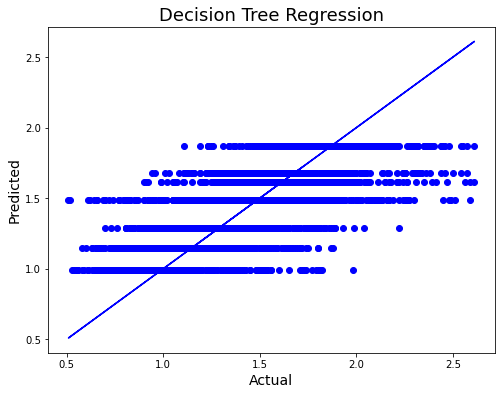

In [122]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_dt,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

thus the Decision Tree regression has  all data points are near to best fit line

GradientBoostingRegressor

In [128]:
#perform gridsearchcv and cross val score on  GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad'],'n_estimators':[50,20],'criterion':['friedman_mse','mse'],'learning_rate':[0.05],'max_depth' : [1,2],'min_weight_fraction_leaf':[0.1,0.2]}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'criterion': 'mse', 'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 2, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 50}


In [129]:

gbr=GradientBoostingRegressor(criterion='mse',loss='ls',n_estimators=50,learning_rate= 0.05,max_depth= 2, min_weight_fraction_leaf= 0.1)
gbr.fit(x_train,y_train)
pred_test_gbr=gbr.predict(x_test)
pred_train_gbr=gbr.predict(x_train)
gbr_score = gbr.score(x_train,y_train)
gbr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",gbr_acc_score*100)
print("score of model is:",gbr_score*100)

Accuracy score is: 52.589660722750175
score of model is: 49.89651979783423


In [130]:
cv_score_gbr=cross_val_score(gbr,x,y,cv=5)
cv_mean_gbr=cv_score_gbr.mean()
print("cv_mean is:",cv_mean_gbr*100)

cv_mean is: 0.4978325162029118


In [131]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_gbr))
print("mean squared error",mean_squared_error(y_test,pred_test_gbr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_gbr)))
print("r2_score is",r2_score(y_test,pred_test_gbr)*100)

mean absolute error 0.21024409425700222
mean squared error 0.07151696280306138
Root mean squared error 0.267426555904722
r2_score is 50.87754267166697


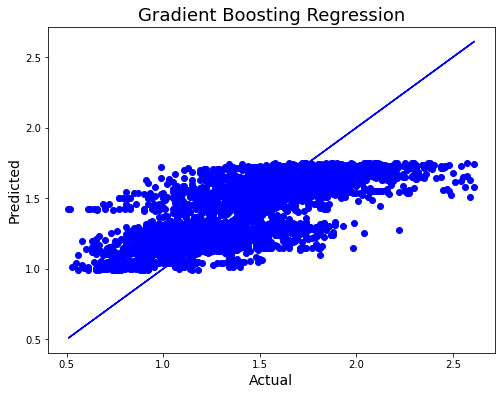

In [132]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_gbr,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Gradient Boosting Regression',fontsize=18)
plt.show()

Support Vector Regressor

In [148]:
#perform gridsearchcv and cross val score on Support Vector Regressor
from sklearn.svm import SVR
parameters ={'kernel':['linear','rbf'],'tol':[0.1,0.001],'shrinking':[True,False],'max_iter':[1,-1]}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001}


In [149]:
sv=SVR(kernel='rbf', max_iter= -1, shrinking= True, tol= 0.001)
sv.fit(x_train,y_train)
pred_test_sv=sv.predict(x_test)
pred_train_sv=sv.predict(x_train)
sv_score = sv.score(x_train,y_train)
sv_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",sv_acc_score*100)
print("score of model is:",sv_score*100)

Accuracy score is: 52.589660722750175
score of model is: 68.98147918511393


In [150]:
cv_score_sv=cross_val_score(sv,x,y,cv=5)
cv_mean_sv=cv_score_sv.mean()
print("cv_mean is:",cv_mean_sv*100)

cv_mean is: -6.8013610345180275


In [151]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_sv))
print("mean squared error",mean_squared_error(y_test,pred_test_sv))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_sv)))
print("r2_score is",r2_score(y_test,pred_test_sv)*100)

mean absolute error 0.15943719619004593
mean squared error 0.045340930027329245
Root mean squared error 0.21293409785031905
r2_score is 68.85692829786846


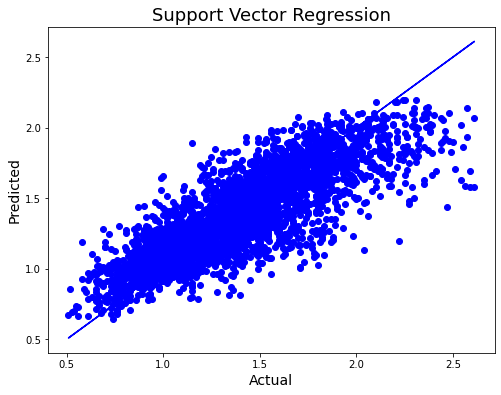

In [152]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_sv,color='b')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

thus the Support Vector Regression performs well here.all data points are near to best fit line

#Elastic Net Regression(combination of L1 & L2)

In [153]:
from sklearn.linear_model import ElasticNet
parameters={'alpha':[0.0001,0.001,0.01,0.1,1],'fit_intercept':[True,False],'normalize':[True,False],'tol':[0.001],'random_state':list(range(0,10))}
enr=ElasticNet()
clf=GridSearchCV(enr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'fit_intercept': True, 'normalize': False, 'random_state': 0, 'tol': 0.001}


In [154]:
enr=ElasticNet(alpha=0.0001,fit_intercept= True,normalize= False, random_state= 0, tol= 0.001)
enr.fit(x_train,y_train)
pred_test_enr=enr.predict(x_test)
pred_train_enr=enr.predict(x_train)
enr_score = enr.score(x_train,y_train)
enr_acc_score=r2_score(y_test,pred_test)
print("Accuracy score is:",enr_acc_score*100)
print("score of model is:",enr_score*100)

Accuracy score is: 52.589660722750175
score of model is: 51.447357918097204


In [155]:
cv_score_enr=cross_val_score(enr,x,y,cv=5)
cv_mean_enr=cv_score_enr.mean()
print("cv_mean is:",cv_mean_enr*100)

cv_mean is: 1.4575754747946656


In [156]:
#evaluation metrics
print("mean absolute error",mean_absolute_error(y_test,pred_test_enr))
print("mean squared error",mean_squared_error(y_test,pred_test_enr))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred_test_enr)))
print("r2_score is",r2_score(y_test,pred_test_enr)*100)

mean absolute error 0.2060299167374968
mean squared error 0.06904141715414021
Root mean squared error 0.2627573351100597
r2_score is 52.57790690327364


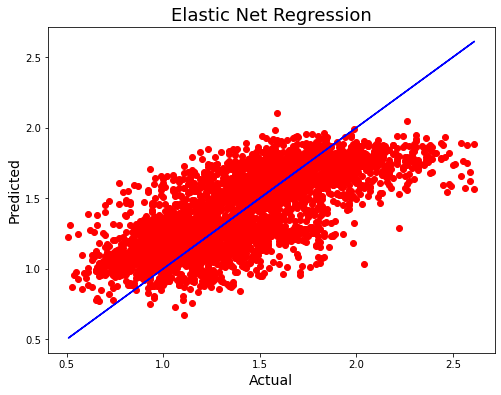

In [157]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_enr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Elastic Net Regression',fontsize=18)
plt.show()

conclusion 
output

In [324]:
import numpy as np
a=np.array(y_test)
predicted=np.array(svc.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


,Original,Predicted
0,20,20
1,27,27
2,33,21
3,31,31
4,16,20
...,...,...
3645,21,21
3646,33,33
3647,26,26
3648,47,48


In [325]:
import pickle
filename='Avacado_fruit_svc.pkl'
pickle.dump(svc,open(filename,'wb'))


In [159]:
models=['Linear Regression','Lasso regression','RandomForestRegressor','Ridge Regressor','Decison Tree Regressor','GradientBoostingRegressor'
,'Support Vector Regressor','ElasticNet Regression']
        


In [160]:
scores=[ r2_score(y_test,pred_test)*100,ls_acc_score*100,rf_acc_score*100,rd_acc_score*100,dt_acc_score*100,gbr_acc_score*100,sv_acc_score*100,enr_acc_score*100]
scores

[52.589660722750175,
 -0.08980570000030053,
 52.589660722750175,
 52.58995325983632,
 48.08726992084841,
 52.589660722750175,
 52.589660722750175,
 52.589660722750175]

In [161]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

[1, 2, 3, 4, 5, 6, 7, 8]

In [162]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.style.hide_index()


Nos,Model Names,Scores
1,Linear Regression,52.589661
2,Lasso regression,-0.089806
3,RandomForestRegressor,52.589661
4,Ridge Regressor,52.589953
5,Decison Tree Regressor,48.087270
6,GradientBoostingRegressor,52.589661
7,Support Vector Regressor,52.589661
8,ElasticNet Regression,52.589661


From the above models,Linear Regression,Random Forest Regression,Ridge Regression,Gradient Boosting Regression,SupportVectorRegression and Elastic Net Regression  performs well.But in Support Vector Regression model best fits the line. so it it the best model and we saved this model

The average price of avacados declined in 2018 sales.And US sanfrancisco is the most seller of avacados.Even though organic avacados selling price is cost and good in quality always conventional avacado sells the best.But in 2018 Average selling price and rate decreased only when calculated from 2015

CLASSIFICATION ALGORITHM TO PREDICT ABOUT REGION: 

In [179]:
df2=pd.read_csv(r"C:\Users\Srividya\Downloads\Avacodo\avocado.csv")

In [180]:
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')
df2['Date'] = df2['Date'].dt.strftime('%m/%Y')

In [181]:
df2.drop('year',axis=1,inplace=True)

In [183]:
df2=df2.drop(['Unnamed: 0','Total Bags'],axis=1)

In [184]:
#converting string data type to int type using LabelEncoding
le=LabelEncoder()

list1=['Date','type','region']
for val in list1:
    df2[val]=le.fit_transform(df2[val].astype(str))
df2

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region
0,36,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,0
1,36,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,0
2,36,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,0
3,36,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,0
4,33,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,53
18245,3,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,53
18246,3,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,53
18247,3,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,53


In [185]:
#seggregate input data and output data
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [186]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.39180039, -0.08624822, -0.08660524, ..., -0.77335071,
        -0.69984934, -0.99983562],
       [ 1.39180039, -0.03402196, -0.15574567, ..., -0.76343481,
        -0.69984934, -0.99983562],
       [ 1.39180039, -1.27393796,  0.17932662, ..., -0.75081989,
        -0.69984934, -0.99983562],
       ...,
       [-1.51219815,  1.14779044, -0.77150535, ..., -0.94348631,
        -0.69984934,  1.00016441],
       [-1.51219815,  1.2658763 , -0.69807719, ..., -0.90851023,
        -0.69984934,  1.00016441],
       [-1.51219815,  0.61828746, -0.66380937, ..., -1.0422502 ,
        -0.69984934,  1.00016441]])

In [187]:
#scaling to get better model performance
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x = mmscaler.fit_transform(x)
x

array([[0.95944423, 0.4873264 , 0.5213057 , ..., 0.18751293, 0.        ,
        0.        ],
       [0.95944423, 0.49532518, 0.50962727, ..., 0.18964443, 0.        ,
        0.        ],
       [0.95944423, 0.30542423, 0.56622393, ..., 0.19235611, 0.        ,
        0.        ],
       ...,
       [0.12934478, 0.67632719, 0.40562003, ..., 0.15094095, 0.        ,
        1.        ],
       [0.12934478, 0.69441278, 0.41802269, ..., 0.15845933, 0.        ,
        1.        ],
       [0.12934478, 0.59523047, 0.42381083, ..., 0.12971088, 0.        ,
        1.        ]])

LogisticRegression

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


In [189]:
lr=LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')

In [190]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train, y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train,pred_train)*100,1)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test)*100,1)
        

In [191]:
#cv score

In [192]:
from sklearn.model_selection import cross_val_score
acc_score=accuracy_score(y_test,pred_test)
for j in range(2,10):
    cross_V_score=cross_val_score(lr,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score*100)
    print("accuracy score is:",acc_score*100)
    print("\n")
        

At cv:- 2
cross validation score is: 40.19178082191781
accuracy score is: 40.19178082191781


At cv:- 3
cross validation score is: 40.19178082191781
accuracy score is: 40.19178082191781


At cv:- 4
cross validation score is: 40.19178082191781
accuracy score is: 40.19178082191781


At cv:- 5
cross validation score is: 40.19178082191781
accuracy score is: 40.19178082191781


At cv:- 6
cross validation score is: 40.19178082191781
accuracy score is: 40.19178082191781


At cv:- 7
cross validation score is: 40.19178082191781
accuracy score is: 40.19178082191781


At cv:- 8
cross validation score is: 40.19178082191781
accuracy score is: 40.19178082191781




KeyboardInterrupt: 

parameter tuning:

In [197]:
#performs GridsearchCV logistic regression
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1', 'l2'],'fit_intercept':[True,False],'random_state':[0,1],'n_jobs':[-1], 'tol':[0.0001,0.001]}
lr=LogisticRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'n_jobs': -1, 'penalty': 'l2', 'random_state': 0, 'tol': 0.0001}


In [210]:
lr=LogisticRegression(fit_intercept= True,n_jobs=-1,penalty='l2', random_state=0, tol= 0.0001)
lr.fit(x_train,y_train)
pred_test_lr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
lr_score = lr.score(x_train,y_train)
lr_acc_score=accuracy_score(y_test,pred_test_lr)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 40.19178082191781
score of model is: 41.47544352352901


In [212]:
cv_score_lr=cross_val_score(lr,x,y,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 31.278253002323776


In [213]:
print(classification_report(y_test, pred_test_lr)) 

              precision    recall  f1-score   support

           0       0.50      0.53      0.52        64
           1       0.18      0.45      0.26        67
           2       0.46      0.36      0.41        74
           3       0.40      0.28      0.33        79
           4       0.31      0.31      0.31        70
           5       0.42      0.19      0.26        70
           6       0.71      0.80      0.75        64
           7       0.46      0.58      0.51        64
           8       0.57      0.60      0.59        72
           9       0.31      0.70      0.43        57
          10       0.46      0.32      0.38        60
          11       0.34      0.36      0.35        73
          12       0.37      0.59      0.45        68
          13       0.27      0.17      0.21        66
          14       0.39      0.50      0.44        58
          15       0.49      0.53      0.51        59
          16       0.57      0.16      0.25        80
          17       0.53    

In [214]:
print(confusion_matrix(y_test,pred_test_lr))

[[34  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 27 ...  0  0  0]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ...  0 56  0]
 [ 0  6  2 ...  0  0  6]]


In [215]:
print(accuracy_score(y_test,pred_test_lr)*100)

40.19178082191781


AUc-ROC Curve

auc roc curve doesnot support categorical data

RandomForestClassifier   

In [217]:
# importing modules

from sklearn.ensemble import RandomForestClassifier

#creating RandomForestClassifier constructor
rf = RandomForestClassifier(random_state=5)
# fit data
rf.fit(x_train,y_train)
# predicting score
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
#calculates score of the model using score method
rf_score = rf.score(x_test,y_test)
print('score of model is : ',rf_score*100)


score of model is :  90.32876712328766


In [218]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_rf)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_rf)*100)

        

Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 90.32876712328766


In [222]:
#choosing best Random state
for i in range(0,5):
    rf.fit(x_train, y_train)
    pred_train_rf=rf.predict(x_train)
    pred_test_rf=rf.predict(x_test)
    if round(accuracy_score(y_train,pred_train_rf)*100,1)== round(accuracy_score(y_test,pred_test_rf)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train,pred_train_rf)*100)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test_rf)*100)

In [223]:

print("accuracy score is:",accuracy_score(y_test,pred_test_rf)*100)

accuracy score is: 90.32876712328766


In [224]:
#cross validation 
from sklearn.model_selection import cross_val_score
acc_score_rf=accuracy_score(y_test,pred_test_rf)
for j in range(2,10):
    cross_V_score=cross_val_score(rf,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score_rf*100)
    print("accuracy score is:",acc_score_rf*100)
    
    
    print("\n")
        

At cv:- 2
cross validation score is: 90.32876712328766
accuracy score is: 90.32876712328766


At cv:- 3
cross validation score is: 90.32876712328766
accuracy score is: 90.32876712328766


At cv:- 4
cross validation score is: 90.32876712328766
accuracy score is: 90.32876712328766


At cv:- 5
cross validation score is: 90.32876712328766
accuracy score is: 90.32876712328766


At cv:- 6
cross validation score is: 90.32876712328766
accuracy score is: 90.32876712328766


At cv:- 7
cross validation score is: 90.32876712328766
accuracy score is: 90.32876712328766


At cv:- 8
cross validation score is: 90.32876712328766
accuracy score is: 90.32876712328766


At cv:- 9
cross validation score is: 90.32876712328766
accuracy score is: 90.32876712328766




parameter tuning

In [225]:
#performs GridSearchCV on RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entropy'],'min_impurity_decrease':[0.0,0.1],'random_state':[0,1],'min_weight_fraction_leaf':[0.1,0.2],'bootstrap':[True,False]}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)



clf.fit(x_train,y_train)
print(clf.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.1, 'random_state': 1}


In [227]:
rf=RandomForestClassifier(criterion="entropy",random_state=1,bootstrap="True",min_weight_fraction_leaf= 0.1,min_impurity_decrease=0.0)
rf.fit(x_train,y_train)
pred_test_rf=rf.predict(x_test)
pred_train_rf=rf.predict(x_train)
rf_score = rf.score(x_train,y_train)
rf_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 40.19178082191781
score of model is: 43.06459346530585


In [228]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 23.683133303550978


In [230]:
print(confusion_matrix(y_test,pred_test_rf))

[[58  0  0 ...  0  0  0]
 [ 0 14  0 ...  2  0  6]
 [ 0  0 50 ...  2  0  0]
 ...
 [ 0  0  0 ... 68  0  0]
 [ 0  0  0 ... 32 29  0]
 [ 0  6  8 ...  1  0 29]]


In [231]:
print(classification_report(y_test,pred_test_rf))

              precision    recall  f1-score   support

           0       0.35      0.91      0.50        64
           1       0.16      0.21      0.18        67
           2       0.54      0.68      0.60        74
           3       0.71      0.53      0.61        79
           4       0.94      0.21      0.35        70
           5       0.93      0.19      0.31        70
           6       0.94      0.27      0.41        64
           7       0.47      0.50      0.48        64
           8       0.52      0.31      0.39        72
           9       0.34      0.75      0.47        57
          10       0.37      0.55      0.44        60
          11       0.71      0.16      0.27        73
          12       0.60      0.26      0.37        68
          13       0.67      0.15      0.25        66
          14       0.74      0.50      0.60        58
          15       0.74      0.44      0.55        59
          16       0.90      0.79      0.84        80
          17       0.80    

DecisionTreeClassifier

In [232]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(random_state=1)
dtc.fit(x_train, y_train)
pred_test_dtc = dtc.predict(x_test)
pred_train_dtc = dtc.predict(x_train)
dtc_score = dtc.score(x_test,y_test)
print('score of model is : ',dtc_score*100)


score of model is :  79.26027397260273


In [233]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_dtc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_dtc)*100)


Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 79.26027397260273


parameter tuning

In [234]:
#perform gridsearchcv and cross val score on Decison Tree DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={'criterion':['gini', 'entropy'],'splitter':['best','random'],'random_state':[0,1],'min_impurity_decrease':[0.0],'min_samples_split': [2,3],'min_samples_leaf':[1,2] }
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1, 'splitter': 'best'}


In [235]:
dt=DecisionTreeClassifier(criterion='gini',max_features= 'auto',max_depth= 11 , random_state= 3, splitter= 'random',min_samples_leaf= 3,min_samples_split= 2)
dt.fit(x_train,y_train)
pred_test_dt=dt.predict(x_test)
pred_train_dt=dt.predict(x_train)
dt_score = dt.score(x_train,y_train)
dt_acc_score=accuracy_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)

Accuracy score is: 43.67123287671233
score of model is: 48.386875813411876


In [236]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 33.60119379676173


In [237]:
print(confusion_matrix(y_test,pred_test_dtc))

[[51  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  1]
 [ 0  0 64 ...  0  0  1]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ...  0 59  0]
 [ 0  0  2 ...  0  0 39]]


In [238]:
print(classification_report(y_test,pred_test_dtc))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        64
           1       0.74      0.67      0.70        67
           2       0.93      0.86      0.90        74
           3       0.84      0.77      0.80        79
           4       0.86      0.79      0.82        70
           5       0.79      0.77      0.78        70
           6       0.97      0.98      0.98        64
           7       0.86      0.84      0.85        64
           8       0.93      0.92      0.92        72
           9       0.78      0.86      0.82        57
          10       0.59      0.68      0.64        60
          11       0.87      0.89      0.88        73
          12       0.76      0.85      0.81        68
          13       0.71      0.74      0.73        66
          14       0.76      0.81      0.78        58
          15       0.97      0.97      0.97        59
          16       0.96      0.90      0.93        80
          17       0.89    

KNeighborsClassifier

In [240]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred_test_knn = knn.predict(x_test)
pred_train_knn = knn.predict(x_train)
knn_score = knn.score(x_test,y_test)
print('score of model is : ',knn_score*100)


score of model is :  77.04109589041096


In [241]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_knn)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_knn)*100)


Accuracy Score of Training Data is: 87.58819097198437
Accuracy Score of Testing Data is: 77.04109589041096


parameter tuning

In [243]:
#perform gridsearchcv and cross val score on KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters={'n_neighbors':[4,5],'weights':['uniform', 'distance'],'leaf_size':[35,30],'n_jobs':[-1,1],'algorithm':['auto', 'ball_tree'] }
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'leaf_size': 35, 'n_jobs': -1, 'n_neighbors': 4, 'weights': 'distance'}


In [244]:
knn=KNeighborsClassifier(algorithm= 'auto', leaf_size= 35, n_jobs= -1, n_neighbors= 6, weights= 'uniform')
knn.fit(x_train,y_train)
pred_test_knn=knn.predict(x_test)
pred_train_knn=knn.predict(x_train)
knn_score = knn.score(x_train,y_train)
knn_acc_score=accuracy_score(y_test,pred_test_knn)
print("Accuracy score is:",knn_acc_score*100)
print("score of model is:",knn_score*100)

Accuracy score is: 75.78082191780821
score of model is: 85.77984793479006


In [245]:
cv_score_knn=cross_val_score(knn,x,y,cv=5)
cv_mean_knn=cv_score_knn.mean()
print("cv_mean is:",cv_mean_knn*100)

cv_mean is: 44.1445545223499


In [246]:
print(confusion_matrix(y_test,pred_test_knn))

[[57  0  0 ...  0  0  0]
 [ 0 47  0 ...  0  0  0]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ...  1 60  0]
 [ 0  3  1 ...  0  0 42]]


In [247]:
print(classification_report(y_test,pred_test_knn))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76        64
           1       0.55      0.70      0.61        67
           2       0.82      0.88      0.85        74
           3       0.74      0.78      0.76        79
           4       0.87      0.77      0.82        70
           5       0.68      0.73      0.70        70
           6       0.85      0.94      0.89        64
           7       0.78      0.80      0.79        64
           8       0.96      0.89      0.92        72
           9       0.51      0.72      0.60        57
          10       0.50      0.63      0.56        60
          11       0.78      0.92      0.84        73
          12       0.86      0.96      0.90        68
          13       0.63      0.67      0.65        66
          14       0.88      0.84      0.86        58
          15       0.92      0.97      0.94        59
          16       0.90      0.88      0.89        80
          17       0.91    

area under the curve we got is 75%

GaussianNB

In [249]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train, y_train)
pred_test_gnb = gnb.predict(x_test)
pred_train_gnb = gnb.predict(x_train)
gnb_score = gnb.score(x_test,y_test)
print('score of model is : ',gnb_score*100)

score of model is :  4.63013698630137


In [250]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_gnb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gnb)*100)


Accuracy Score of Training Data is: 5.007192273443387
Accuracy Score of Testing Data is: 4.63013698630137


parameter tuning

In [252]:
#perform gridsearchcv and cross val score on GaussianNB
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb=GaussianNB() 
clf = GridSearchCV(estimator=gnb, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
clf.fit(x_train,y_train)
print(clf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 0.01873817422860384}


In [253]:
gnb=GaussianNB(var_smoothing=0.15199110829529336)
gnb.fit(x_train,y_train)
pred_test_gnb=gnb.predict(x_test)
pred_train_gnb=gnb.predict(x_train)
gnb_score = gnb.score(x_train,y_train)
gnb_acc_score=accuracy_score(y_test,pred_test_gnb)
print("Accuracy score is:",gnb_acc_score*100)
print("score of model is:",gnb_score*100)

Accuracy score is: 3.780821917808219
score of model is: 4.33591341872731


In [254]:
cv_score_gnb=cross_val_score(gnb,x,y,cv=5)
cv_mean_gnb=cv_score_gnb.mean()
print("cv_mean is:",cv_mean_gnb*100)

cv_mean is: 2.3453331180995356


In [255]:
print(confusion_matrix(y_test,pred_test_gnb))

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 3  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 34  1  0]
 [ 0  0  0 ... 32  0  0]
 [ 5  0  0 ...  0 15  0]]


In [256]:
print(classification_report(y_test,pred_test_gnb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.00      0.00      0.00        67
           2       0.00      0.00      0.00        74
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        70
           5       0.00      0.00      0.00        70
           6       0.00      0.00      0.00        64
           7       0.25      0.30      0.27        64
           8       0.00      0.00      0.00        72
           9       0.08      0.05      0.06        57
          10       0.00      0.00      0.00        60
          11       0.00      0.00      0.00        73
          12       0.01      0.03      0.01        68
          13       0.00      0.00      0.00        66
          14       0.00      0.00      0.00        58
          15       0.00      0.00      0.00        59
          16       0.00      0.00      0.00        80
          17       0.02    

SVC

In [258]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)
pred_test_svc = svc.predict(x_test)
pred_train_svc = svc.predict(x_train)
svc_score = svc.score(x_test,y_test)
print('score of model is : ',svc_score*100)


score of model is :  70.08219178082193


In [259]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_svc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_svc)*100)


Accuracy Score of Training Data is: 72.65566134666757
Accuracy Score of Testing Data is: 70.08219178082193


parameter tuning

In [263]:
#perform gridsearchcv and cross val score on Support Vector classifier

parameters ={'kernel':['linear','rbf'],'tol':[0.01,0.001],'shrinking':[True,False],'max_iter':[1,-1],'probability':[True,False]}
svc=SVC()
clf=GridSearchCV(svc,parameters)

clf.fit(x_train,y_train)
print(clf.best_params_)


{'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'shrinking': True, 'tol': 0.01}


In [264]:
svc=SVC(kernel='rbf',max_iter= -1, probability= True, shrinking= True, tol= 0.01)
svc.fit(x_train,y_train)
pred_test_svc=svc.predict(x_test)
pred_train_svc=svc.predict(x_train)
svc_score = svc.score(x_train,y_train)
svc_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",svc_acc_score*100)
print("score of model is:",svc_score*100)

Accuracy score is: 40.19178082191781
score of model is: 72.66251113089938


In [265]:
cv_score_svc=cross_val_score(svc,x,y,cv=5)
cv_mean_svc=cv_score_svc.mean()
print("cv_mean is:",cv_mean_svc*100)

cv_mean is: 53.24068969918574


In [266]:
print(confusion_matrix(y_test,pred_test_svc))

[[58  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  0  1 ...  0  0 22]]


In [267]:
print(classification_report(y_test,pred_test_svc))

              precision    recall  f1-score   support

           0       0.58      0.91      0.71        64
           1       0.38      0.54      0.44        67
           2       0.87      0.88      0.87        74
           3       0.76      0.59      0.67        79
           4       0.78      0.50      0.61        70
           5       0.72      0.56      0.63        70
           6       0.95      0.91      0.93        64
           7       0.78      0.66      0.71        64
           8       0.89      0.90      0.90        72
           9       0.55      0.82      0.66        57
          10       0.43      0.68      0.53        60
          11       0.76      0.90      0.82        73
          12       0.87      0.96      0.91        68
          13       0.48      0.52      0.50        66
          14       0.78      0.86      0.82        58
          15       0.91      0.98      0.94        59
          16       0.94      0.79      0.86        80
          17       0.84    

#Gradient Boosting Classifier

In [269]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=7)
gb.fit(x_train, y_train)
pred_test_gb = gb.predict(x_test)
pred_train_gb = gb.predict(x_train)
gb_score = gb.score(x_test,y_test)
print('score of model is : ',gb_score*100)



score of model is :  83.15068493150685


In [270]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_gb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gb)*100)


Accuracy Score of Training Data is: 97.84916775121584
Accuracy Score of Testing Data is: 83.15068493150685


parameter tuning

In [280]:
from sklearn.model_selection import GridSearchCV
parameters={'min_impurity_decrease':[0.1],'random_state':[0],'min_weight_fraction_leaf':[0.1],'learning_rate':[0.5]}
gb=GradientBoostingClassifier()
clf=GridSearchCV(gb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'learning_rate': 0.5, 'min_impurity_decrease': 0.1, 'min_weight_fraction_leaf': 0.1, 'random_state': 0}


In [281]:
gb=GradientBoostingClassifier(learning_rate= 0.5, min_impurity_decrease= 0.1,random_state=0,min_weight_fraction_leaf= 0.1)
gb.fit(x_train,y_train)
pred_test_gb=gb.predict(x_test)
pred_train_gb=gb.predict(x_train)
gb_score = gb.score(x_train,y_train)
gb_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",gb_acc_score*100)
print("score of model is:",gb_score*100)

Accuracy score is: 40.19178082191781
score of model is: 78.96431262415234


In [282]:
cv_score_gb=cross_val_score(gb,x,y,cv=5)
cv_mean_gb=cv_score_gb.mean()
print("cv_mean is:",cv_mean_gb*100)

cv_mean is: 52.80210078197442


In [283]:
print(confusion_matrix(y_test,pred_test_gb))

[[47  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  0  0]
 [ 0  0  0 ... 11 41  0]
 [ 0  1  4 ...  0  0 40]]


In [284]:
print(classification_report(y_test,pred_test_gb))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66        64
           1       0.58      0.64      0.61        67
           2       0.82      0.81      0.82        74
           3       0.78      0.75      0.76        79
           4       0.79      0.80      0.79        70
           5       0.71      0.64      0.68        70
           6       0.82      0.80      0.81        64
           7       0.79      0.81      0.80        64
           8       0.92      0.93      0.92        72
           9       0.67      0.77      0.72        57
          10       0.53      0.60      0.56        60
          11       0.84      0.77      0.80        73
          12       0.85      0.84      0.84        68
          13       0.69      0.73      0.71        66
          14       0.80      0.74      0.77        58
          15       0.93      0.69      0.80        59
          16       0.87      0.91      0.89        80
          17       0.91    

Light Gradient Boosting Classifier

In [286]:
!pip install lightgbm

In [287]:
#Light Gradient Boosting Classifier

In [288]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
pred_test_lgbm = lgbm.predict(x_test)
pred_train_lgbm = lgbm.predict(x_train)
lgbm_score = lgbm.score(x_test,y_test)
print('score of model is : ',lgbm_score*100)


score of model is :  89.36986301369862


In [289]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_lgbm)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_lgbm)*100)


Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 89.36986301369862


In [290]:
print(confusion_matrix(y_test,pred_test_lgbm))

[[58  0  0 ...  0  0  0]
 [ 0 53  0 ...  0  0  0]
 [ 0  0 68 ...  0  0  0]
 ...
 [ 0  0  0 ... 71  1  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  2  1 ...  0  0 55]]


In [291]:
print(classification_report(y_test,pred_test_lgbm))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        64
           1       0.75      0.79      0.77        67
           2       0.94      0.92      0.93        74
           3       0.89      0.86      0.88        79
           4       0.95      0.89      0.92        70
           5       0.88      0.80      0.84        70
           6       1.00      0.95      0.98        64
           7       0.91      0.95      0.93        64
           8       0.99      0.96      0.97        72
           9       0.81      0.91      0.86        57
          10       0.74      0.83      0.78        60
          11       0.94      0.99      0.96        73
          12       0.97      0.93      0.95        68
          13       0.84      0.88      0.86        66
          14       0.87      0.91      0.89        58
          15       1.00      1.00      1.00        59
          16       0.96      0.95      0.96        80
          17       0.95    

CatBoostClassifier

In [293]:
!pip install catboost

In [294]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train, y_train)
pred_test_cat = cat.predict(x_test)
pred_train_cat = cat.predict(x_train)
cat_score = cat.score(x_test,y_test)
print('score of model is : ',cat_score*100)


Learning rate set to 0.09072
0:	learn: 3.8280973	total: 259ms	remaining: 4m 18s
1:	learn: 3.6153753	total: 339ms	remaining: 2m 49s
2:	learn: 3.4659686	total: 421ms	remaining: 2m 20s
3:	learn: 3.2953563	total: 505ms	remaining: 2m 5s
4:	learn: 3.2243678	total: 585ms	remaining: 1m 56s
5:	learn: 3.1581364	total: 672ms	remaining: 1m 51s
6:	learn: 3.1176995	total: 750ms	remaining: 1m 46s
7:	learn: 2.9557186	total: 830ms	remaining: 1m 42s
8:	learn: 2.8200087	total: 912ms	remaining: 1m 40s
9:	learn: 2.6956918	total: 995ms	remaining: 1m 38s
10:	learn: 2.5914127	total: 1.1s	remaining: 1m 38s
11:	learn: 2.5200985	total: 1.18s	remaining: 1m 37s
12:	learn: 2.4231938	total: 1.27s	remaining: 1m 36s
13:	learn: 2.3925335	total: 1.36s	remaining: 1m 35s
14:	learn: 2.3032623	total: 1.44s	remaining: 1m 34s
15:	learn: 2.2494996	total: 1.53s	remaining: 1m 33s
16:	learn: 2.2069351	total: 1.61s	remaining: 1m 33s
17:	learn: 2.1478158	total: 1.69s	remaining: 1m 32s
18:	learn: 2.1077543	total: 1.77s	remaining: 1m

In [295]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train,pred_train_cat)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_cat)*100)


Accuracy Score of Training Data is: 99.04103020754846
Accuracy Score of Testing Data is: 90.68493150684932


In [296]:
print(confusion_matrix(y_test,pred_test_cat))

[[61  0  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  0]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  0  1 ...  0  0 54]]


In [297]:
print(classification_report(y_test,pred_test_cat))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        64
           1       0.87      0.87      0.87        67
           2       0.97      0.96      0.97        74
           3       0.91      0.87      0.89        79
           4       0.97      0.91      0.94        70
           5       0.88      0.86      0.87        70
           6       0.98      1.00      0.99        64
           7       0.92      0.86      0.89        64
           8       0.99      0.97      0.98        72
           9       0.80      0.89      0.84        57
          10       0.81      0.83      0.82        60
          11       0.92      0.95      0.93        73
          12       0.89      0.99      0.94        68
          13       0.82      0.88      0.85        66
          14       0.90      0.93      0.92        58
          15       1.00      1.00      1.00        59
          16       1.00      0.96      0.98        80
          17       0.96    

ExtraTreesClassifier

In [298]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)
pred_test_etc = etc.predict(x_test)
pred_train_etc = etc.predict(x_train)
etc_score = etc.score(x_test,y_test)
print('score of model is : ',etc_score*100)

score of model is :  91.56164383561644


In [299]:
print(confusion_matrix(y_test,pred_test_etc))

[[61  0  0 ...  0  0  0]
 [ 0 57  0 ...  0  0  0]
 [ 0  0 72 ...  0  0  0]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ...  0 66  0]
 [ 0  0  1 ...  0  0 54]]


In [300]:
print(classification_report(y_test,pred_test_etc))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92        64
           1       0.80      0.85      0.83        67
           2       0.95      0.97      0.96        74
           3       0.92      0.87      0.90        79
           4       0.98      0.91      0.95        70
           5       0.90      0.86      0.88        70
           6       1.00      1.00      1.00        64
           7       0.93      0.89      0.91        64
           8       0.99      0.97      0.98        72
           9       0.83      0.91      0.87        57
          10       0.81      0.87      0.84        60
          11       0.96      1.00      0.98        73
          12       0.94      0.99      0.96        68
          13       0.81      0.82      0.81        66
          14       0.87      0.91      0.89        58
          15       1.00      1.00      1.00        59
          16       1.00      0.96      0.98        80
          17       0.95    

AdaBoost

In [301]:
#AdaBoost

In [302]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=1)
abc.fit(x_train, y_train)
pred_test_abc = abc.predict(x_test)
pred_train_abc = abc.predict(x_train)
abc_score = abc.score(x_test,y_test)
print('score of model is : ',abc_score*100)



score of model is :  6.164383561643835


In [303]:
print(confusion_matrix(y_test,pred_test_abc))

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 37 ...  0  0  0]
 ...
 [ 0  0 20 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [304]:
print(classification_report(y_test,pred_test_abc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.00      0.00      0.00        67
           2       0.12      0.50      0.19        74
           3       0.14      0.32      0.19        79
           4       0.50      0.01      0.03        70
           5       0.00      0.00      0.00        70
           6       0.00      0.00      0.00        64
           7       0.00      0.00      0.00        64
           8       0.00      0.00      0.00        72
           9       0.00      0.00      0.00        57
          10       0.00      0.00      0.00        60
          11       0.00      0.00      0.00        73
          12       0.00      0.00      0.00        68
          13       0.06      0.52      0.10        66
          14       0.00      0.00      0.00        58
          15       0.00      0.00      0.00        59
          16       0.00      0.00      0.00        80
          17       0.17    

XGBoost

In [306]:
#XGBoost

In [307]:
!pip install xgboost

In [308]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
pred_test_xgb = xgb.predict(x_test)
pred_train_xgb = xgb.predict(x_train)
xgb_score = xgb.score(x_test,y_test)
print('score of model is : ',xgb_score*100)




[21:44:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score of model is :  88.05479452054794


In [309]:
print(confusion_matrix(y_test,pred_test_xgb))

[[57  0  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  1]
 [ 0  0 63 ...  0  0  1]
 ...
 [ 0  0  0 ... 72  0  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  1  1 ...  0  0 52]]


In [310]:
print(classification_report(y_test,pred_test_xgb))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        64
           1       0.77      0.76      0.77        67
           2       0.94      0.85      0.89        74
           3       0.87      0.87      0.87        79
           4       0.94      0.87      0.90        70
           5       0.85      0.83      0.84        70
           6       1.00      0.98      0.99        64
           7       0.89      0.91      0.90        64
           8       0.99      0.93      0.96        72
           9       0.78      0.89      0.84        57
          10       0.74      0.75      0.74        60
          11       0.90      0.97      0.93        73
          12       0.91      0.93      0.92        68
          13       0.78      0.86      0.82        66
          14       0.87      0.83      0.85        58
          15       1.00      1.00      1.00        59
          16       0.96      0.94      0.95        80
          17       0.95    

Voting classifier

In [311]:
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('knn',KNeighborsClassifier()))
estimator.append(('svc',SVC(gamma='auto',probability=True)))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator

[('knn', KNeighborsClassifier()),
 ('svc', SVC(gamma='auto', probability=True)),
 ('dtc', DecisionTreeClassifier())]

In [313]:
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(x_train,y_train)
y_pred_vot_h=vot_hard.predict(x_test)
print(y_pred_vot_h)
vot_h_score=accuracy_score(y_test,y_pred_vot_h)
print("Hard Voting Score %d" %vot_h_score)

[20 27 21 ... 26 19 22]
Hard Voting Score 0


In [315]:
vot_hard=VotingClassifier(estimators=estimator,voting='soft')
vot_hard.fit(x_train,y_train)
y_pred_vot_s=vot_hard.predict(x_test)
print(y_pred_vot_s)
vot_s_score=accuracy_score(y_test,y_pred_vot_s)
print("Soft Voting Score %d" %vot_s_score)

[20 27 21 ... 26 19 35]
Soft Voting Score 0




CONCLUSION
    
OUTPUT

In [320]:
import numpy as np
a=np.array(y_test)
predicted=np.array(etc.predict(x_test))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


,Original,Predicted
0,20,20
1,27,27
2,33,33
3,31,31
4,16,16
...,...,...
3645,21,21
3646,33,33
3647,26,26
3648,47,47


In [326]:
import pickle
filename='Avacado_Fruit_etc.pkl'
pickle.dump(etc,open(filename,'wb'))


In [316]:
models=['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC','Gradient Boosting Classifier','Light Gradient Boosting Classifier','CatBoostClassifier',
'ExtraTreesClassifier','AdaBoost','XGBoost','Hard Voting classifier','SoftVoting Classifier']

        

In [317]:
scores=[(accuracy_score(y_test,pred_test)*100),accuracy_score(y_test,pred_test_rf)*100,accuracy_score(y_test,pred_test_dtc)*100,
       accuracy_score(y_test,pred_test_knn)*100,accuracy_score(y_test,pred_test_gnb)*100,accuracy_score(y_test,pred_test_svc)*100,
       accuracy_score(y_test,pred_test_gb)*100,accuracy_score(y_test,pred_test_lgbm)*100,accuracy_score(y_test,pred_test_cat)*100,
       accuracy_score(y_test,pred_test_etc)*100,accuracy_score(y_test,pred_test_abc)*100,accuracy_score(y_test,pred_test_xgb)*100,
       accuracy_score(y_test,y_pred_vot_h)*100,accuracy_score(y_test,y_pred_vot_s)*100]
scores

[40.19178082191781,
 40.76712328767123,
 79.26027397260273,
 75.78082191780821,
 3.780821917808219,
 70.10958904109589,
 72.32876712328768,
 89.36986301369862,
 90.68493150684932,
 91.56164383561644,
 6.164383561643835,
 88.05479452054794,
 76.0,
 82.02739726027397]

In [318]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos  

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [319]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.style.hide_index()

Nos,Model Names,Scores
1,LogisticRegression,40.191781
2,RandomForestClassifier,40.767123
3,DecisionTreeClassifier,79.260274
4,KNeighborsClassifier,75.780822
5,GaussianNB,3.780822
6,SVC,70.109589
7,Gradient Boosting Classifier,72.328767
8,Light Gradient Boosting Classifier,89.369863
9,CatBoostClassifier,90.684932
10,ExtraTreesClassifier,91.561644


From the above models Extra Tree Classifier works the best among all.So we are saving this model for prediction.Because This model implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Among the regions the most avacado buying people is in US Sanfrancisco.They buy conventional avacados more with high Average price even